# **1-1) Dataset Download**

In [1]:
!pip install --upgrade mplfinance
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 19.9 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=8347176ffffdf032dba4815841a89615a60e5aef1d1a93589d591d79b5ea381a
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-s

In [2]:
from torch.utils.data import DataLoader
from statistics import mean
from torch.optim import Adam
from urllib.request import urlretrieve
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, WindowAverage, SeasonalWindowAverage

import random
import lxml
import html5lib
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import torch
import copy
import os
import sys
import yfinance as yf
import bs4 as bs
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.utils.data as data

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
html = requests.get(url).content
SP500_all = pd.read_html(html)

In [4]:
SP500_all[0]

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [5]:
selected = []
for dt in range(0, len(SP500_all[0])):
  if datetime.strptime(SP500_all[0].loc[dt].at['Date added'], '%Y-%m-%d') < datetime(2010, 1, 1):
    selected.append(dt)
SP500_since2010 = SP500_all[0].loc[selected].copy()

In [6]:
del(selected)
SP500_since2010

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
2      ABT                Abbott             Health Care   
5     ADBE            Adobe Inc.  Information Technology   
7      AES       AES Corporation               Utilities   
8      AFL                 Aflac              Financials   
..     ...                   ...                     ...   
495   WYNN          Wynn Resorts  Consumer Discretionary   
496    XEL           Xcel Energy               Utilities   
498    YUM           Yum! Brands  Consumer Discretionary   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
2                           Health Care Equipment  North Chicago, Illinois   
5                            Application Software     San Jose, California   
7    Independent Power Producers & Energy Traders      Arlington, Virginia   
8                         Life & Health Insurance        Columbus, Georgia   
..                                            ...                      ...   
495                              Casinos & Gaming         Paradise, Nevada   
496                               Multi-Utilities   Minneapolis, Minnesota   
498                                   Restaurants     Louisville, Kentucky   
500                         Health Care Equipment          Warsaw, Indiana   
501                                Regional Banks     Salt Lake City, Utah   

     Date added      CIK Founded  
0    1957-03-04    66740    1902  
2    1957-03-04     1800    1888  
5    1997-05-05   796343    1982  
7    1998-10-02   874761    1981  
8    1999-05-28     4977    1955  
..          ...      ...     ...  
495  2008-11-14  1174922    2002  
496  1957-03-04    72903    1909  
498  1997-10-06  1041061    1997  
500  2001-08-07  1136869    1927  
501  2001-06-22   109380    1873  

[290 rows x 8 columns]

In [7]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]

In [8]:
Raw_Price_For_My_Tickers = yf.download(tickers=tickers, start="2010-01-04", interval="1d", group_by='ticker')

[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-04 -> 2023-12-21)')


In [9]:
Raw_Price_For_My_Tickers

UBER                                              \
                 Open       High        Low      Close  Adj Close   
Date                                                                
2010-01-04        NaN        NaN        NaN        NaN        NaN   
2010-01-05        NaN        NaN        NaN        NaN        NaN   
2010-01-06        NaN        NaN        NaN        NaN        NaN   
2010-01-07        NaN        NaN        NaN        NaN        NaN   
2010-01-08        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...   
2023-12-14  62.009998  62.810001  60.610001  62.500000  62.500000   
2023-12-15  62.160000  63.529999  61.410000  61.860001  61.860001   
2023-12-18  62.009998  62.490002  61.330002  61.730000  61.730000   
2023-12-19  61.880001  62.700001  61.689999  62.119999  62.119999   
2023-12-20  61.490002  62.279999  60.619999  60.680000  60.680000   

                               JCI                                   ...  \
                 Volume       Open       High        Low      Close  ...   
Date                                                                 ...   
2010-01-04          NaN  18.728437  19.025137  18.665976  18.879391  ...   
2010-01-05          NaN  18.848158  18.947058  18.671181  18.785694  ...   
2010-01-06          NaN  18.775286  18.848158  18.692001  18.723232  ...   
2010-01-07          NaN  18.749260  18.900209  18.629538  18.858568  ...   
2010-01-08          NaN  18.785694  18.983494  18.655563  18.921032  ...   
...                 ...        ...        ...        ...        ...  ...   
2023-12-14   44818100.0  53.750000  55.279999  53.750000  54.099998  ...   
2023-12-15  364231800.0  53.470001  53.709999  52.209999  52.439999  ...   
2023-12-18   28614000.0  52.500000  54.240002  52.310001  53.520000  ...   
2023-12-19   26813800.0  54.110001  54.700001  53.790001  54.119999  ...   
2023-12-20   28259200.0  54.000000  55.580002  53.630001  54.709999  ...   

                   HES                                         JBHT  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2010-01-04   61.770000   63.160000   51.961605  3729300   32.560001   
2010-01-05   63.139999   63.549999   52.282448  3195800   33.049999   
2010-01-06   63.310001   63.720001   52.422310  3545900   32.970001   
2010-01-07   63.080002   64.940002   53.426014  4994300   32.880001   
2010-01-08   64.080002   65.830002   54.158222  2164400   33.119999   
...                ...         ...         ...      ...         ...   
2023-12-14  138.000000  143.100006  142.662003  4778100  197.559998   
2023-12-15  140.889999  144.610001  144.610001  6319100  202.000000   
2023-12-18  144.830002  145.729996  145.729996  3003000  203.210007   
2023-12-19  145.500000  147.080002  147.080002  2771500  199.000000   
2023-12-20  145.770004  145.770004  145.770004  2272700  196.970001   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2010-01-04   33.110001   32.240002   33.060001   28.787348  1876000  
2010-01-05   33.150002   32.459999   33.150002   28.865734  2186900  
2010-01-06   33.299999   32.849998   32.950001   28.691572  1147200  
2010-01-07   33.259998   32.619999   33.080002   28.804768  1272400  
2010-01-08   34.139999   33.119999   34.040001   29.640697  2068200  
...                ...         ...         ...         ...      ...  
2023-12-14  201.919998  196.320007  201.729996  201.729996  1039300  
2023-12-15  207.639999  200.539993  202.220001  202.220001  2340900  
2023-12-18  203.520004  198.210007  198.460007  198.460007   818400  
2023-12-19  200.470001  198.320007  198.860001  198.860001   809300  
2023-12-20  204.110001  196.220001  197.580002  197.580002   808700  

[3516 row

# **1-2)**

In [10]:
# number of lists with NaN values
nan_indices = (Raw_Price_For_My_Tickers.isna().sum()>0)
print(nan_indices)

UBER  Open          True
      High          True
      Low           True
      Close         True
      Adj Close     True
                   ...  
JBHT  High         False
      Low          False
      Close        False
      Adj Close    False
      Volume       False
Length: 3018, dtype: bool


In [11]:
Raw_Price_For_My_TickersEdited = Raw_Price_For_My_Tickers.interpolate()
# number of lists with NaN values
nan_indices = (Raw_Price_For_My_TickersEdited.isna().sum()>0).sum()
print(nan_indices)

402


In [12]:
Raw_Price_For_My_TickersEdited = Raw_Price_For_My_TickersEdited.fillna(method='bfill')
# number of lists with NaN values
nan_indices = (Raw_Price_For_My_TickersEdited.isna().sum()>0).sum()
print(nan_indices)

12


In [13]:
Raw_Price_For_My_TickersEdited = Raw_Price_For_My_TickersEdited.fillna(method='ffill')
# number of lists with NaN values
nan_indices = (Raw_Price_For_My_TickersEdited.isna().sum()>0).sum()
print(nan_indices)

12


In [14]:
Raw_Price_For_My_TickersEdited.columns[(Raw_Price_For_My_TickersEdited.isna().any())].tolist()

[('BRK.B', 'Open'),
 ('BRK.B', 'High'),
 ('BRK.B', 'Low'),
 ('BRK.B', 'Close'),
 ('BRK.B', 'Adj Close'),
 ('BRK.B', 'Volume'),
 ('BF.B', 'Open'),
 ('BF.B', 'High'),
 ('BF.B', 'Low'),
 ('BF.B', 'Close'),
 ('BF.B', 'Adj Close'),
 ('BF.B', 'Volume')]

In [15]:
# cannot replace NaN values in following data, we remove them
print(Raw_Price_For_My_Tickers['BF.B'])
print(Raw_Price_For_My_Tickers['BRK.B'])

            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2010-01-04   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-05   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-06   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-07   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-08   NaN   NaN  NaN    NaN        NaN     NaN
...          ...   ...  ...    ...        ...     ...
2023-12-14   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-15   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-18   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-19   NaN   NaN  NaN    NaN        NaN     NaN
2023-12-20   NaN   NaN  NaN    NaN        NaN     NaN

[3516 rows x 6 columns]
            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2010-01-04   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-05   NaN   NaN  NaN    NaN        NaN     NaN
2010-01-06   NaN   NaN  NaN    NaN        NaN     NaN
201

In [16]:
Raw_Price_For_My_TickersEdited=Raw_Price_For_My_TickersEdited.drop('BRK.B', axis='columns')
Raw_Price_For_My_TickersEdited=Raw_Price_For_My_TickersEdited.drop('BF.B', axis='columns')
# number of lists with NaN values
nan_indices = (Raw_Price_For_My_TickersEdited.isna().sum()>0).sum()
print(nan_indices)

0


<ipython-input-16-d9d1e8e56045>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Raw_Price_For_My_TickersEdited=Raw_Price_For_My_TickersEdited.drop('BRK.B', axis='columns')
<ipython-input-16-d9d1e8e56045>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Raw_Price_For_My_TickersEdited=Raw_Price_For_My_TickersEdited.drop('BF.B', axis='columns')


In [17]:
Raw_Price_For_My_TickersEdited

UBER                                              \
                 Open       High        Low      Close  Adj Close   
Date                                                                
2010-01-04  42.000000  45.000000  41.060001  41.570000  41.570000   
2010-01-05  42.000000  45.000000  41.060001  41.570000  41.570000   
2010-01-06  42.000000  45.000000  41.060001  41.570000  41.570000   
2010-01-07  42.000000  45.000000  41.060001  41.570000  41.570000   
2010-01-08  42.000000  45.000000  41.060001  41.570000  41.570000   
...               ...        ...        ...        ...        ...   
2023-12-14  62.009998  62.810001  60.610001  62.500000  62.500000   
2023-12-15  62.160000  63.529999  61.410000  61.860001  61.860001   
2023-12-18  62.009998  62.490002  61.330002  61.730000  61.730000   
2023-12-19  61.880001  62.700001  61.689999  62.119999  62.119999   
2023-12-20  61.490002  62.279999  60.619999  60.680000  60.680000   

                               JCI                                   ...  \
                 Volume       Open       High        Low      Close  ...   
Date                                                                 ...   
2010-01-04  186322500.0  18.728437  19.025137  18.665976  18.879391  ...   
2010-01-05  186322500.0  18.848158  18.947058  18.671181  18.785694  ...   
2010-01-06  186322500.0  18.775286  18.848158  18.692001  18.723232  ...   
2010-01-07  186322500.0  18.749260  18.900209  18.629538  18.858568  ...   
2010-01-08  186322500.0  18.785694  18.983494  18.655563  18.921032  ...   
...                 ...        ...        ...        ...        ...  ...   
2023-12-14   44818100.0  53.750000  55.279999  53.750000  54.099998  ...   
2023-12-15  364231800.0  53.470001  53.709999  52.209999  52.439999  ...   
2023-12-18   28614000.0  52.500000  54.240002  52.310001  53.520000  ...   
2023-12-19   26813800.0  54.110001  54.700001  53.790001  54.119999  ...   
2023-12-20   28259200.0  54.000000  55.580002  53.630001  54.709999  ...   

                   HES                                         JBHT  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2010-01-04   61.770000   63.160000   51.961605  3729300   32.560001   
2010-01-05   63.139999   63.549999   52.282448  3195800   33.049999   
2010-01-06   63.310001   63.720001   52.422310  3545900   32.970001   
2010-01-07   63.080002   64.940002   53.426014  4994300   32.880001   
2010-01-08   64.080002   65.830002   54.158222  2164400   33.119999   
...                ...         ...         ...      ...         ...   
2023-12-14  138.000000  143.100006  142.662003  4778100  197.559998   
2023-12-15  140.889999  144.610001  144.610001  6319100  202.000000   
2023-12-18  144.830002  145.729996  145.729996  3003000  203.210007   
2023-12-19  145.500000  147.080002  147.080002  2771500  199.000000   
2023-12-20  145.770004  145.770004  145.770004  2272700  196.970001   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2010-01-04   33.110001   32.240002   33.060001   28.787348  1876000  
2010-01-05   33.150002   32.459999   33.150002   28.865734  2186900  
2010-01-06   33.299999   32.849998   32.950001   28.691572  1147200  
2010-01-07   33.259998   32.619999   33.080002   28.804768  1272400  
2010-01-08   34.139999   33.119999   34.040001   29.640697  2068200  
...                ...         ...         ...         ...      ...  
2023-12-14  201.919998  196.320007  201.729996  201.729996  1039300  
2023-12-15  207.639999  200.539993  202.220001  202.220001  2340900  
2023-12-18  203.520004  198.210007  198.460007  198.460007   818400  
2023-12-19  200.470001  198.320007  198.860001  198.860001   809300  
2023-12-20  204.110001  196.220001  197.580002  197.580002   808700  

[3516 row

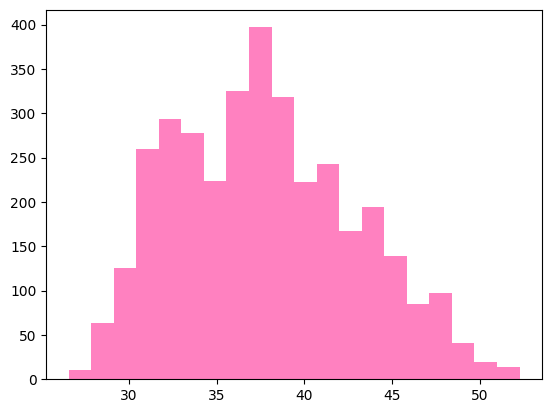

In [18]:
plt.hist(Raw_Price_For_My_TickersEdited['FE']['Close'], bins=20, color="XKCD:pink");

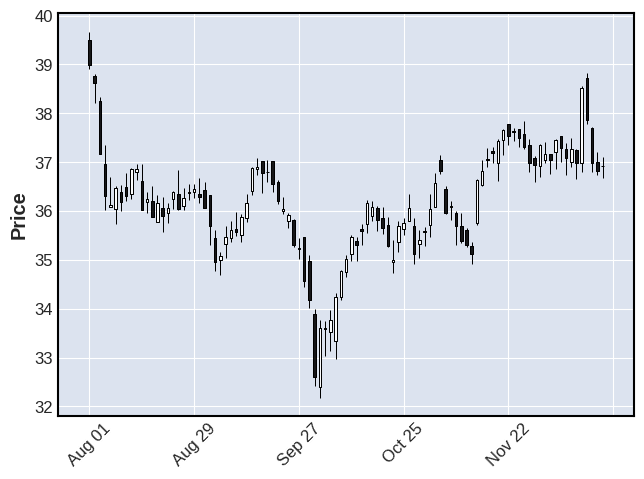

In [19]:
idx = pd.DatetimeIndex(Raw_Price_For_My_TickersEdited['FE'].index)[-100:-1]
dt = Raw_Price_For_My_TickersEdited['FE'][-100:-1]
dframe = pd.DataFrame(data=dt, index=idx)
mpf.plot(dframe, type='candle')

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


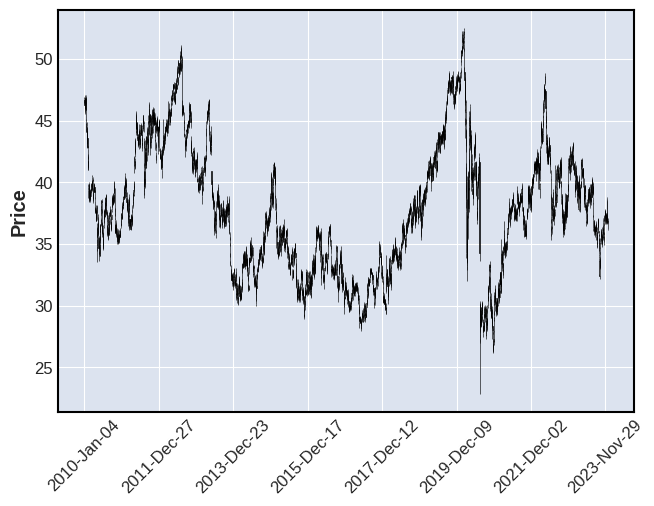

In [20]:
idx = pd.DatetimeIndex(Raw_Price_For_My_TickersEdited['FE'].index)
dt = Raw_Price_For_My_TickersEdited['FE']
dframe = pd.DataFrame(data=dt, index=idx)
mpf.plot(dframe, type='candle')

# **1-3 & 1-4) Time Series Split and Windowing**

In [28]:
Raw_Price_For_My_TickersEdited
Raw_Price_For_My_TickersWorking = Raw_Price_For_My_TickersEdited[['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']].copy()

In [29]:
cols = []
for col in Raw_Price_For_My_TickersWorking.columns:
  if 'Close' not in col:
    cols.append(col)
Raw_Price_For_My_TickersWorking.drop(columns=cols, inplace=True)
ds_naive = copy.deepcopy(Raw_Price_For_My_TickersWorking)
Raw_Price_For_My_TickersWorking

AAPL        MSFT        AMZN        META       GOOGL
                 Close       Close       Close       Close       Close
Date                                                                  
2010-01-04    7.643214   30.950001    6.695000   38.230000   15.684434
2010-01-05    7.656429   30.959999    6.734500   38.230000   15.615365
2010-01-06    7.534643   30.770000    6.612500   38.230000   15.221722
2010-01-07    7.520714   30.450001    6.500000   38.230000   14.867367
2010-01-08    7.570714   30.660000    6.676000   38.230000   15.065566
...                ...         ...         ...         ...         ...
2023-12-14  198.110001  365.929993  147.419998  333.170013  131.940002
2023-12-15  197.570007  370.730011  149.970001  334.920013  132.600006
2023-12-18  195.889999  372.649994  154.070007  344.619995  135.800003
2023-12-19  196.940002  373.260010  153.789993  350.359985  136.649994
2023-12-20  194.830002  370.619995  152.119995  349.279999  138.339996

[3516 rows x 5 columns]

In [30]:
cv_n_splits = 5
tss = TimeSeriesSplit(n_splits=cv_n_splits)

Train_ds = []
Val_ds = []

Train_ds_us = []
Val_ds_us = []

scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))

for train_index, val_index in tss.split(Raw_Price_For_My_TickersWorking):
  scaled1_values = Raw_Price_For_My_TickersWorking.iloc[train_index]
  scaled2_values = Raw_Price_For_My_TickersWorking.iloc[val_index]
  scaler1.fit(scaled1_values)
  scaler2.fit(scaled2_values)
  Train_ds.append(np.array(scaler1.transform(Raw_Price_For_My_TickersWorking.iloc[train_index])))
  Val_ds.append(np.array(scaler2.transform(Raw_Price_For_My_TickersWorking.iloc[val_index])))
  # UnScaled data
  Train_ds_us.append(np.array(Raw_Price_For_My_TickersWorking.iloc[train_index]))
  Val_ds_us.append(np.array(Raw_Price_For_My_TickersWorking.iloc[val_index]))

for i in range(cv_n_splits):
  print('Train ', i, ' shape: ', np.shape(Train_ds[i]), ' and validation ', i, ' shape: ', np.shape(Val_ds[i]))

Train  0  shape:  (586, 5)  and validation  0  shape:  (586, 5)
Train  1  shape:  (1172, 5)  and validation  1  shape:  (586, 5)
Train  2  shape:  (1758, 5)  and validation  2  shape:  (586, 5)
Train  3  shape:  (2344, 5)  and validation  3  shape:  (586, 5)
Train  4  shape:  (2930, 5)  and validation  4  shape:  (586, 5)


In [31]:
window_size = 10
trainWindows = []
valWindows = []

for i in range(cv_n_splits):
  windowsPerSet = []
  for j in range(len(Train_ds[i]) - window_size):
    temp = []
    for k in range(j, j+window_size):
      temp.append(k)
    windowsPerSet.append(temp)
  trainWindows.append(windowsPerSet)

for i in range(cv_n_splits):
  windowsPerSet = []
  for j in range(len(Val_ds[i]) - window_size):
    temp = []
    for k in range(j, j+window_size):
      temp.append(k)
    windowsPerSet.append(temp)
  valWindows.append(windowsPerSet)

# UnScaled data
trainWindows_us = []
valWindows_us = []

for i in range(cv_n_splits):
  windowsPerSet = []
  for j in range(len(Train_ds_us[i]) - window_size):
    temp = []
    for k in range(j, j+window_size):
      temp.append(k)
    windowsPerSet.append(temp)
  trainWindows_us.append(windowsPerSet)

for i in range(cv_n_splits):
  windowsPerSet = []
  for j in range(len(Val_ds_us[i]) - window_size):
    temp = []
    for k in range(j, j+window_size):
      temp.append(k)
    windowsPerSet.append(temp)
  valWindows_us.append(windowsPerSet)

In [32]:
xTrain = []
yTrain = []
for i in range(0, len(trainWindows)):
  xTrainPerSet = []
  yTrainPerSet = []
  for ele in trainWindows[i]:
    xTrainPerSet.append(Train_ds[i][ele])
    yTrainPerSet.append(Train_ds[i][ele[window_size-1] + 1])
  xTrain.append(xTrainPerSet)
  yTrain.append(yTrainPerSet)

xVal = []
yVal = []
for i in range(0, len(valWindows)):
  xValPerSet = []
  yValPerSet = []
  for ele in valWindows[i]:
    xValPerSet.append(Val_ds[i][ele])
    yValPerSet.append(Val_ds[i][ele[window_size-1] + 1])
  xVal.append(xValPerSet)
  yVal.append(yValPerSet)

# UnScaled data
xTrain_us = []
yTrain_us = []
for i in range(0, len(trainWindows_us)):
  xTrainPerSet = []
  yTrainPerSet = []
  for ele in trainWindows_us[i]:
    xTrainPerSet.append(Train_ds_us[i][ele])
    yTrainPerSet.append(Train_ds_us[i][ele[window_size-1] + 1])
  xTrain_us.append(xTrainPerSet)
  yTrain_us.append(yTrainPerSet)

xVal_us = []
yVal_us = []
for i in range(0, len(valWindows_us)):
  xValPerSet = []
  yValPerSet = []
  for ele in valWindows_us[i]:
    xValPerSet.append(Val_ds_us[i][ele])
    yValPerSet.append(Val_ds_us[i][ele[window_size-1] + 1])
  xVal_us.append(xValPerSet)
  yVal_us.append(yValPerSet)

In [33]:
xTrain = [np.transpose(xTrain[i], axes=(2, 0, 1)).tolist() for i in range(cv_n_splits)]
yTrain = [np.transpose(yTrain[i], axes=(1, 0)).tolist() for i in range(cv_n_splits)]
xVal = [np.transpose(xVal[i], axes=(2, 0, 1)).tolist() for i in range(cv_n_splits)]
yVal = [np.transpose(yVal[i], axes=(1, 0)).tolist() for i in range(cv_n_splits)]

xTrain = [[xTrain[i][j] for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
yTrain = [[np.reshape(yTrain[i][j], (np.shape(yTrain[i][j])[0], 1)) for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
xVal = [[xVal[i][j] for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
yVal = [[np.reshape(yVal[i][j], (np.shape(yVal[i][j])[0], 1)) for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]

# UnScaled data
xTrain_us = [np.transpose(xTrain_us[i], axes=(2, 0, 1)).tolist() for i in range(cv_n_splits)]
yTrain_us = [np.transpose(yTrain_us[i], axes=(1, 0)).tolist() for i in range(cv_n_splits)]
xVal_us = [np.transpose(xVal_us[i], axes=(2, 0, 1)).tolist() for i in range(cv_n_splits)]
yVal_us = [np.transpose(yVal_us[i], axes=(1, 0)).tolist() for i in range(cv_n_splits)]

xTrain_us = [[xTrain_us[i][j] for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
yTrain_us = [[np.reshape(yTrain_us[i][j], (np.shape(yTrain_us[i][j])[0], 1)) for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
xVal_us = [[xVal_us[i][j] for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]
yVal_us = [[np.reshape(yVal_us[i][j], (np.shape(yVal_us[i][j])[0], 1)) for i in range(cv_n_splits)] for j in range(len(['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']))]



# First Dim: Ticker
# Second Dim: Split
# Third Dim: Test vector (window size consecutive days)
# Fourth Dim: Test (1 day)
for i in range(cv_n_splits):
  print('Train ', i, ' x shape: ', np.shape(xTrain[0][i]), ', y shape: ', np.shape(yTrain[0][i]), ' and validation ', i, ' shape: ', np.shape(xVal[0][i]), ', y shape: ', np.shape(yVal[0][i]))

Train  0  x shape:  (576, 10) , y shape:  (576, 1)  and validation  0  shape:  (576, 10) , y shape:  (576, 1)
Train  1  x shape:  (1162, 10) , y shape:  (1162, 1)  and validation  1  shape:  (576, 10) , y shape:  (576, 1)
Train  2  x shape:  (1748, 10) , y shape:  (1748, 1)  and validation  2  shape:  (576, 10) , y shape:  (576, 1)
Train  3  x shape:  (2334, 10) , y shape:  (2334, 1)  and validation  3  shape:  (576, 10) , y shape:  (576, 1)
Train  4  x shape:  (2920, 10) , y shape:  (2920, 1)  and validation  4  shape:  (576, 10) , y shape:  (576, 1)


In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
for nds in range(0, 5):
  for i in range(0, 5):
  # split: i
    xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
    yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
    xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
    yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

In [35]:
# UnScaled data
for nds in range(0, 5):
  for i in range(0, 5):
  # split: i
    xTrain_us[nds][i] = torch.from_numpy(np.array(xTrain_us[nds][i])).type(torch.Tensor).to(device)
    yTrain_us[nds][i] = torch.from_numpy(np.array(yTrain_us[nds][i])).type(torch.Tensor).to(device)
    xVal_us[nds][i] = torch.from_numpy(np.array(xVal_us[nds][i])).type(torch.Tensor).to(device)
    yVal_us[nds][i] = torch.from_numpy(np.array(yVal_us[nds][i])).type(torch.Tensor).to(device)

# **1-5)**

# **LSTM with unscaled Data**

In [36]:
class LSTMModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of LSTM units
      # num_layers : number of LSTM layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__() #initializes the parent class nn.Module
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

### **AAPL**

In [37]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model11 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model11.parameters(), lr=1e-3)
print(model11)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [38]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model11.train()
		for j in range(0, len(xTrain_us[nds][i])):

			predictions = model11(xTrain_us[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain_us[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain_us[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model11.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal_us[nds][i])):
				predictions_test = model11(xVal_us[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal_us[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal_us[nds][i])
		average_mae = total_mae / len(xVal_us[nds][i])
		average_mse = total_mse / len(xVal_us[nds][i])
		average_mape = total_mape / len(xVal_us[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 4.1618, Test Loss: 15.1641, MAE: 3.1507, MSE: 15.1641, MAPE: 0.1879
Epoch [10/10] - Training Loss: 6.1323, Test Loss: 31.7231, MAE: 4.8439, MSE: 31.7231, MAPE: 0.3330
Epoch [5/10] - Training Loss: 27.4892, Test Loss: 187.4190, MAE: 13.4341, MSE: 187.4190, MAPE: 0.9276
Epoch [10/10] - Training Loss: 58.2813, Test Loss: 310.0774, MAE: 17.4107, MSE: 310.0774, MAPE: 1.6572
Epoch [5/10] - Training Loss: 50.1710, Test Loss: 693.3643, MAE: 25.5871, MSE: 693.3643, MAPE: 1.4835
Epoch [10/10] - Training Loss: 8.0901, Test Loss: 297.3502, MAE: 16.0837, MSE: 297.3502, MAPE: 0.6012
Epoch [5/10] - Training Loss: 129.1984, Test Loss: 5649.9372, MAE: 67.6242, MSE: 5649.9372, MAPE: 2.4902
Epoch [10/10] - Training Loss: 143.9264, Test Loss: 5460.2763, MAE: 66.2070, MSE: 5460.2763, MAPE: 2.3171
Epoch [5/10] - Training Loss: 1102.3191, Test Loss: 16495.4585, MAE: 127.2963, MSE: 16495.4585, MAPE: 3.6426
Epoch [10/10] - Training Loss: 1082.9702, Test Loss: 15691.8495, MAE: 124.

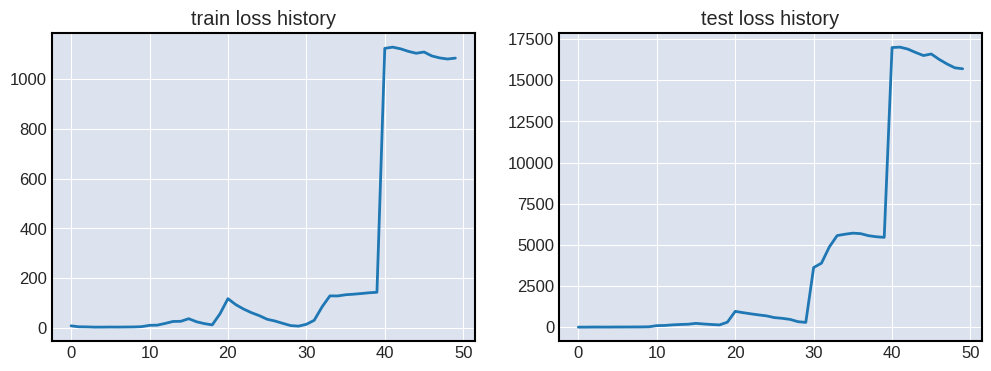

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

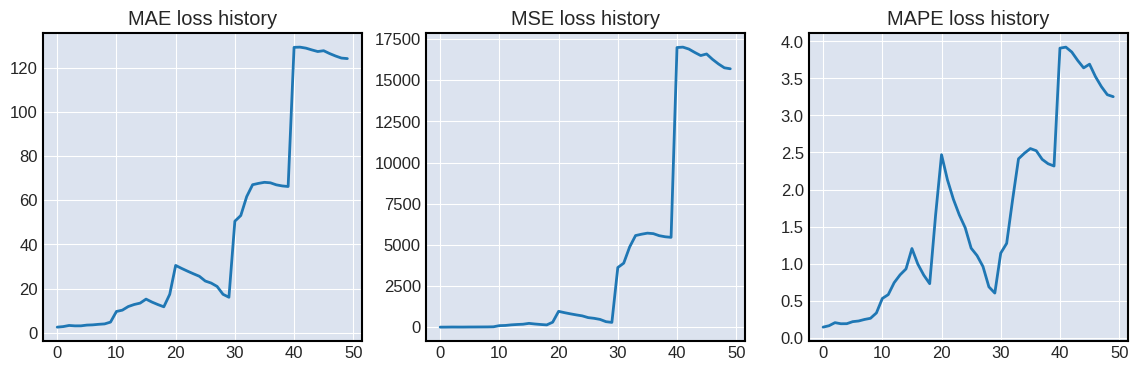

In [40]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

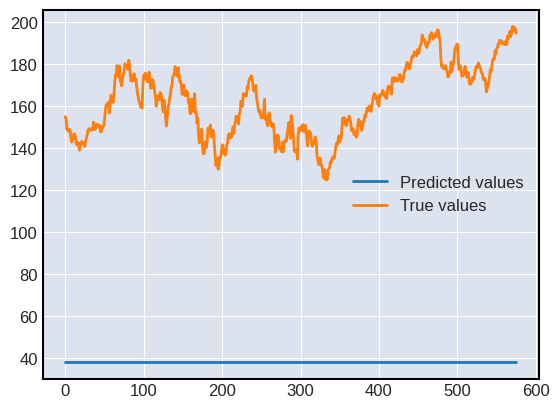

In [41]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal_us[nds][4])):
    predictions_test.append(model11(xVal_us[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal_us[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [42]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model12 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model12.parameters(), lr=1e-3)
print(model12)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [43]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i


	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model12.train()
		for j in range(0, len(xTrain_us[nds][i])):

			predictions = model12(xTrain_us[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain_us[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain_us[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model12.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal_us[nds][i])):
				predictions_test = model12(xVal_us[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal_us[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal_us[nds][i])
		average_mae = total_mae / len(xVal_us[nds][i])
		average_mse = total_mse / len(xVal_us[nds][i])
		average_mape = total_mape / len(xVal_us[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 4.7439, Test Loss: 55.5011, MAE: 5.7464, MSE: 55.5011, MAPE: 0.2024
Epoch [10/10] - Training Loss: 4.5356, Test Loss: 49.4372, MAE: 5.3792, MSE: 49.4372, MAPE: 0.1856
Epoch [5/10] - Training Loss: 26.1455, Test Loss: 348.7924, MAE: 17.8077, MSE: 348.7924, MAPE: 0.5470
Epoch [10/10] - Training Loss: 34.3425, Test Loss: 448.3157, MAE: 20.4117, MSE: 448.3157, MAPE: 0.6815
Epoch [5/10] - Training Loss: 127.9951, Test Loss: 3424.2173, MAE: 55.7978, MSE: 3424.2173, MAPE: 1.6162
Epoch [10/10] - Training Loss: 144.8053, Test Loss: 3670.4559, MAE: 57.9623, MSE: 3670.4559, MAPE: 1.7912
Epoch [5/10] - Training Loss: 741.2361, Test Loss: 25084.2250, MAE: 151.2958, MSE: 25084.2250, MAPE: 3.4801
Epoch [10/10] - Training Loss: 687.4382, Test Loss: 23494.1707, MAE: 145.9464, MSE: 23494.1707, MAPE: 2.9893
Epoch [5/10] - Training Loss: 4655.4525, Test Loss: 56229.4900, MAE: 233.8862, MSE: 56229.4900, MAPE: 3.8714
Epoch [10/10] - Training Loss: 4401.1610, Test Loss: 52550.55

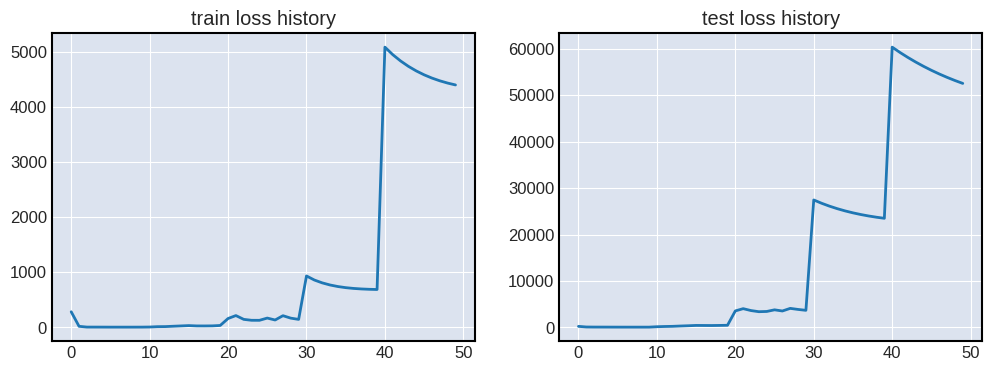

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

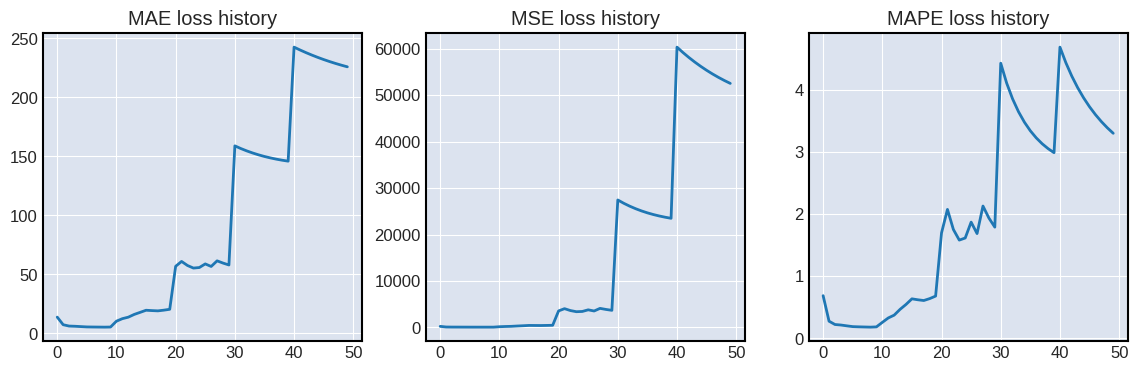

In [45]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

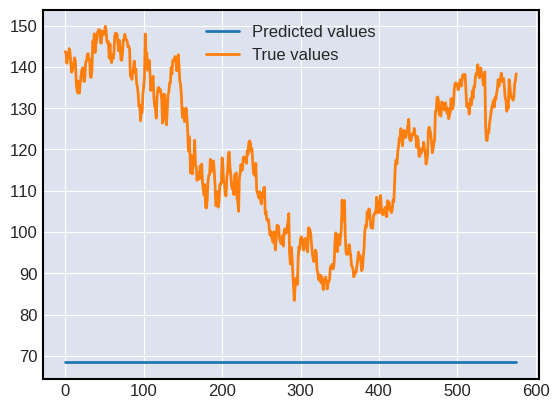

In [61]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal_us[nds][4])):
    predictions_test.append(model12(xVal_us[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal_us[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [46]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model13 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model13.parameters(), lr=1e-3)
print(model13)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [47]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i


	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model13.train()
		for j in range(0, len(xTrain_us[nds][i])):

			predictions = model13(xTrain_us[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain_us[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain_us[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model13.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal_us[nds][i])):
				predictions_test = model13(xVal_us[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal_us[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal_us[nds][i])
		average_mae = total_mae / len(xVal_us[nds][i])
		average_mse = total_mse / len(xVal_us[nds][i])
		average_mape = total_mape / len(xVal_us[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.5476, Test Loss: 32.5163, MAE: 5.0981, MSE: 32.5163, MAPE: 0.5321
Epoch [10/10] - Training Loss: 0.6889, Test Loss: 33.3324, MAE: 5.1752, MSE: 33.3324, MAPE: 0.5447
Epoch [5/10] - Training Loss: 6.3706, Test Loss: 251.8369, MAE: 13.4693, MSE: 251.8369, MAPE: 0.9555
Epoch [10/10] - Training Loss: 9.1923, Test Loss: 316.9102, MAE: 15.7001, MSE: 316.9102, MAPE: 1.3232
Epoch [5/10] - Training Loss: 65.4115, Test Loss: 2929.3598, MAE: 50.8305, MSE: 2929.3598, MAPE: 2.9034
Epoch [10/10] - Training Loss: 48.8527, Test Loss: 2652.0384, MAE: 48.0252, MSE: 2652.0384, MAPE: 2.3643
Epoch [5/10] - Training Loss: 666.3455, Test Loss: 12060.6284, MAE: 104.5564, MSE: 12060.6284, MAPE: 4.0146
Epoch [10/10] - Training Loss: 638.3099, Test Loss: 11577.9965, MAE: 102.2224, MSE: 11577.9965, MAPE: 3.6022
Epoch [5/10] - Training Loss: 2600.5806, Test Loss: 9823.0651, MAE: 95.6389, MSE: 9823.0651, MAPE: 2.7763
Epoch [10/10] - Training Loss: 2464.7267, Test Loss: 8902.7534, MAE:

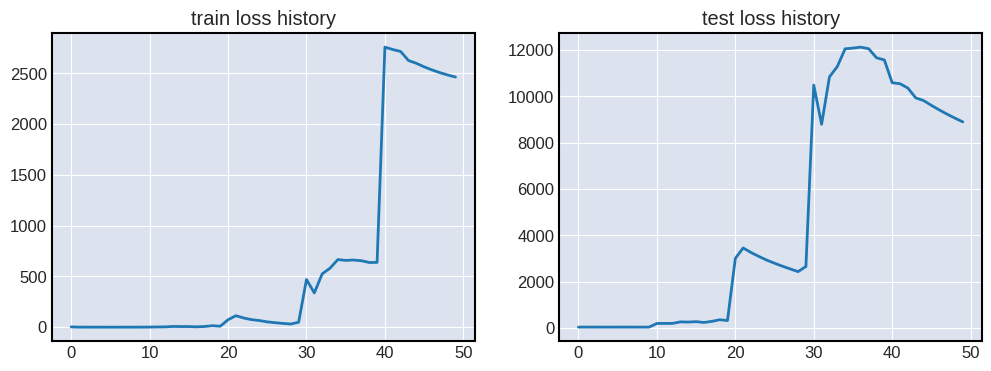

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

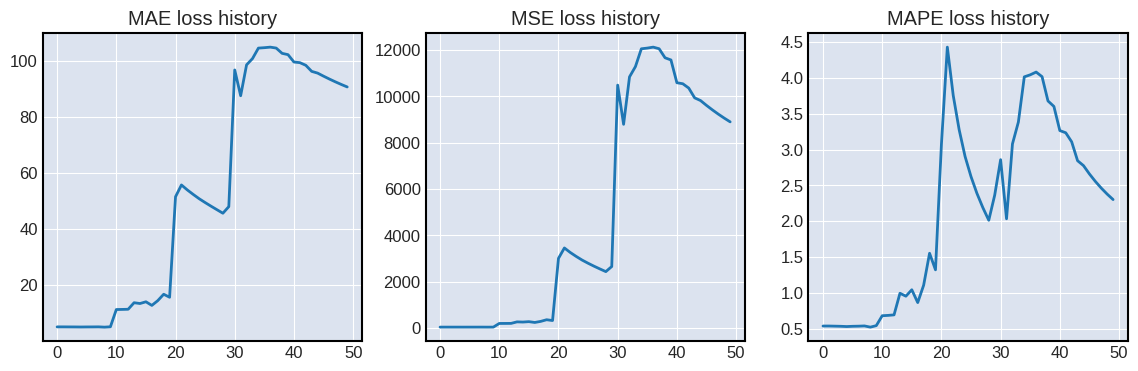

In [49]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

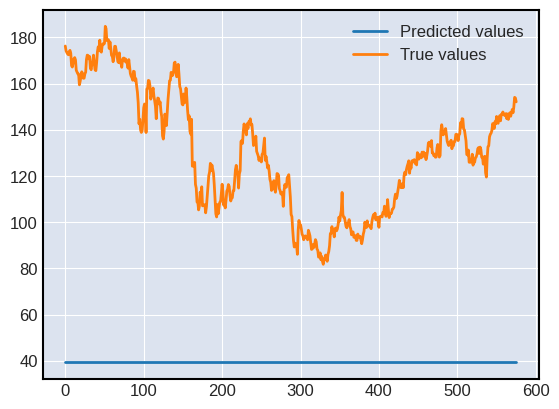

In [50]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal_us[nds][4])):
    predictions_test.append(model13(xVal_us[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal_us[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [51]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model14 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model14.parameters(), lr=1e-3)
print(model14)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [52]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i


	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model14.train()
		for j in range(0, len(xTrain_us[nds][i])):

			predictions = model14(xTrain_us[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain_us[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain_us[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model14.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal_us[nds][i])):
				predictions_test = model14(xVal_us[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal_us[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal_us[nds][i])
		average_mae = total_mae / len(xVal_us[nds][i])
		average_mse = total_mse / len(xVal_us[nds][i])
		average_mape = total_mape / len(xVal_us[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0311, Test Loss: 319.0782, MAE: 15.7136, MSE: 319.0782, MAPE: 0.4115
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 318.9038, MAE: 15.7157, MSE: 318.9038, MAPE: 0.4112
Epoch [5/10] - Training Loss: 313.5465, Test Loss: 5458.0940, MAE: 71.5927, MSE: 5458.0940, MAPE: 2.5802
Epoch [10/10] - Training Loss: 465.4173, Test Loss: 6240.3420, MAE: 76.8620, MSE: 6240.3420, MAPE: 3.4195
Epoch [5/10] - Training Loss: 1737.2188, Test Loss: 16712.2580, MAE: 127.8845, MSE: 16712.2580, MAPE: 3.4971
Epoch [10/10] - Training Loss: 2087.2653, Test Loss: 19115.0337, MAE: 136.9570, MSE: 19115.0337, MAPE: 4.9809
Epoch [5/10] - Training Loss: 5954.5720, Test Loss: 48011.4806, MAE: 211.9266, MSE: 48011.4806, MAPE: 6.8453
Epoch [10/10] - Training Loss: 5107.2812, Test Loss: 44566.4010, MAE: 203.6365, MSE: 44566.4010, MAPE: 5.1883
Epoch [5/10] - Training Loss: 11459.8401, Test Loss: 40629.7405, MAE: 185.8156, MSE: 40629.7405, MAPE: 3.7168
Epoch [10/10] - Training Loss: 10238.6

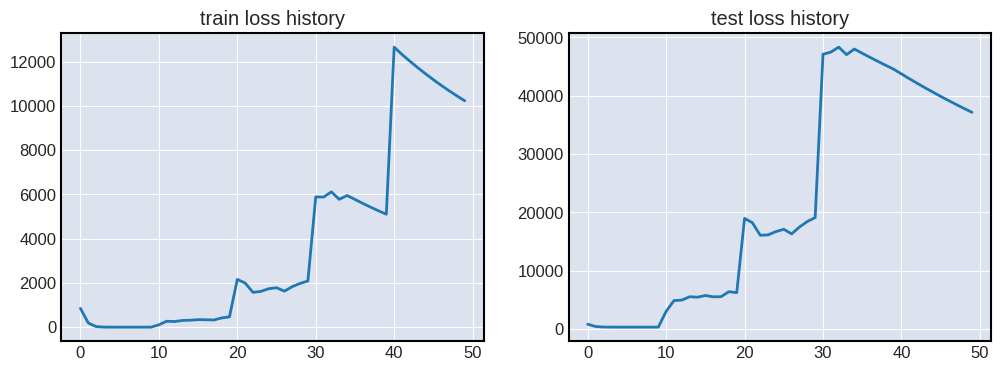

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

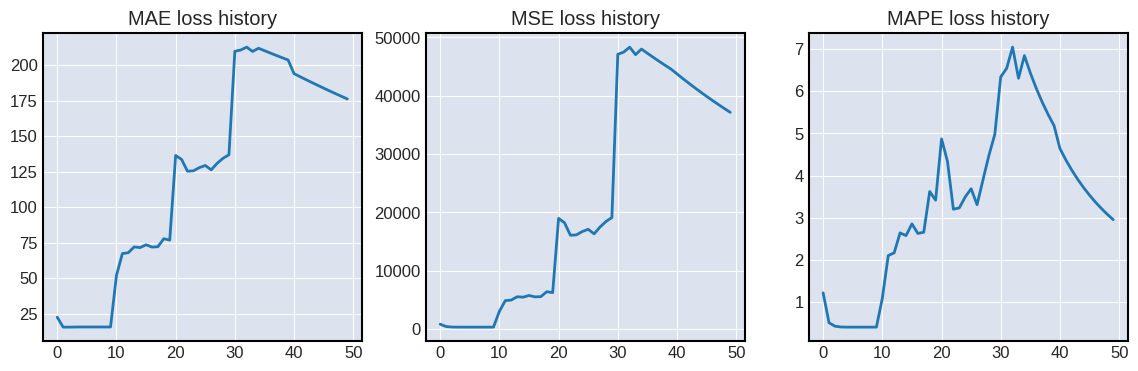

In [54]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

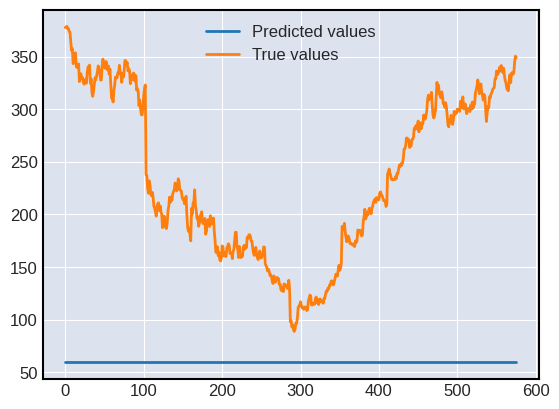

In [55]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal_us[nds][4])):
    predictions_test.append(model14(xVal_us[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal_us[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [56]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model15 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model15.parameters(), lr=1e-3)
print(model15)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [57]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i


	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model15.train()
		for j in range(0, len(xTrain_us[nds][i])):

			predictions = model15(xTrain_us[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain_us[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain_us[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model15.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal_us[nds][i])):
				predictions_test = model15(xVal_us[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal_us[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal_us[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal_us[nds][i])
		average_mae = total_mae / len(xVal_us[nds][i])
		average_mse = total_mse / len(xVal_us[nds][i])
		average_mape = total_mape / len(xVal_us[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 1.0371, Test Loss: 73.2920, MAE: 7.1251, MSE: 73.2920, MAPE: 0.4600
Epoch [10/10] - Training Loss: 1.1173, Test Loss: 73.2477, MAE: 7.1225, MSE: 73.2477, MAPE: 0.4598
Epoch [5/10] - Training Loss: 13.3117, Test Loss: 153.6852, MAE: 11.2828, MSE: 153.6852, MAPE: 0.5049
Epoch [10/10] - Training Loss: 16.2671, Test Loss: 156.0606, MAE: 11.3875, MSE: 156.0606, MAPE: 0.5120
Epoch [5/10] - Training Loss: 66.3692, Test Loss: 800.6339, MAE: 27.6905, MSE: 800.6339, MAPE: 1.1159
Epoch [10/10] - Training Loss: 110.1370, Test Loss: 1062.9638, MAE: 32.0795, MSE: 1062.9638, MAPE: 1.5706
Epoch [5/10] - Training Loss: 232.4314, Test Loss: 3320.3340, MAE: 52.8556, MSE: 3320.3340, MAPE: 1.8643
Epoch [10/10] - Training Loss: 225.9189, Test Loss: 3134.8360, MAE: 51.0707, MSE: 3134.8360, MAPE: 1.6946
Epoch [5/10] - Training Loss: 711.7779, Test Loss: 7395.0847, MAE: 84.1595, MSE: 7395.0847, MAPE: 2.3317
Epoch [10/10] - Training Loss: 687.7166, Test Loss: 6788.0146, MAE: 80.472

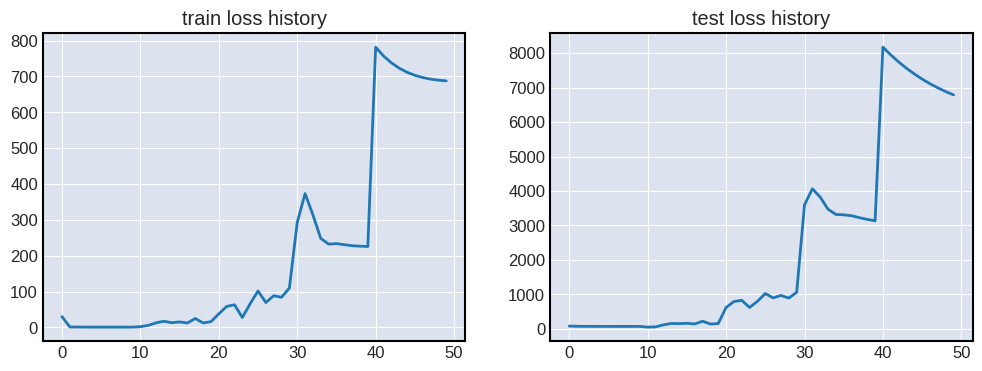

In [58]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

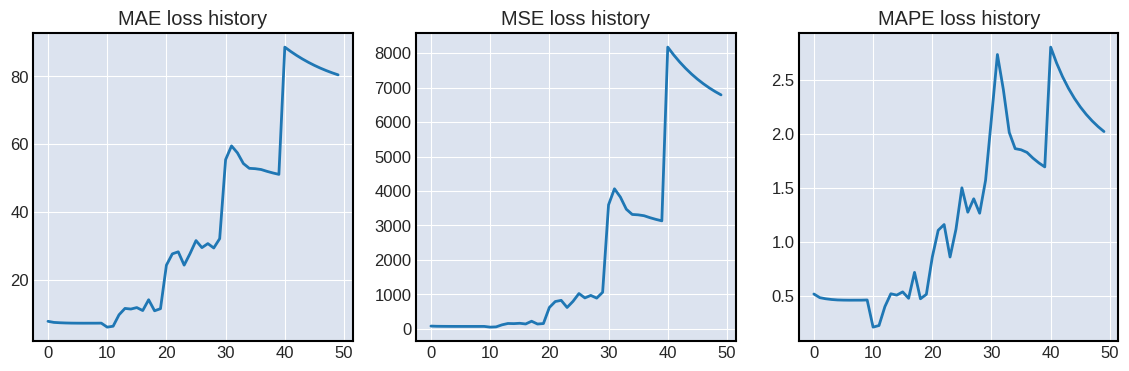

In [59]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

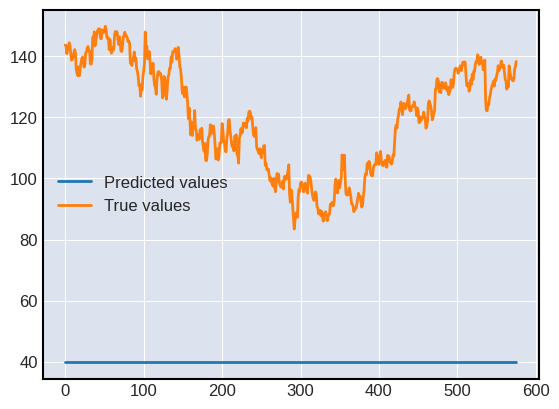

In [60]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal_us[nds][4])):
    predictions_test.append(model15(xVal_us[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal_us[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **LSTM**

In [ ]:
class LSTMModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of LSTM units
      # num_layers : number of LSTM layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__() #initializes the parent class nn.Module
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

### **AAPL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model11 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model11.parameters(), lr=1e-3)
print(model11)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model11.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model11(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model11.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model11(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0026, Test Loss: 0.0160, MAE: 0.1002, MSE: 0.0160, MAPE: 0.7075
Epoch [10/10] - Training Loss: 0.0029, Test Loss: 0.0192, MAE: 0.1103, MSE: 0.0192, MAPE: 0.6109
Epoch [5/10] - Training Loss: 0.0023, Test Loss: 0.0308, MAE: 0.1448, MSE: 0.0308, MAPE: 2.1665
Epoch [10/10] - Training Loss: 0.0020, Test Loss: 0.0267, MAE: 0.1342, MSE: 0.0267, MAPE: 2.1476
Epoch [5/10] - Training Loss: 0.0017, Test Loss: 0.0151, MAE: 0.1053, MSE: 0.0151, MAPE: 3.9590
Epoch [10/10] - Training Loss: 0.0016, Test Loss: 0.0129, MAE: 0.0944, MSE: 0.0129, MAPE: 1.3171
Epoch [5/10] - Training Loss: 0.0011, Test Loss: 0.0346, MAE: 0.1624, MSE: 0.0346, MAPE: 0.3923
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0348, MAE: 0.1629, MSE: 0.0348, MAPE: 0.3945
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0320, MAE: 0.1484, MSE: 0.0320, MAPE: 0.7792
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0276, MAE: 0.1373, MSE: 0.0276, MAPE: 0.9685


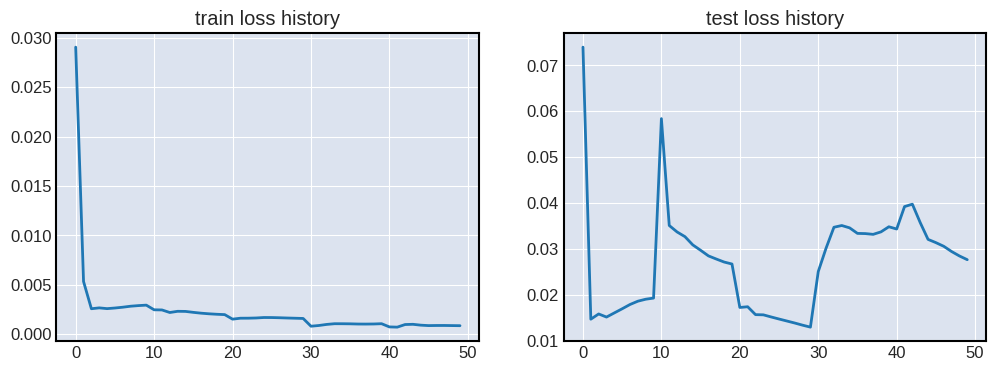

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

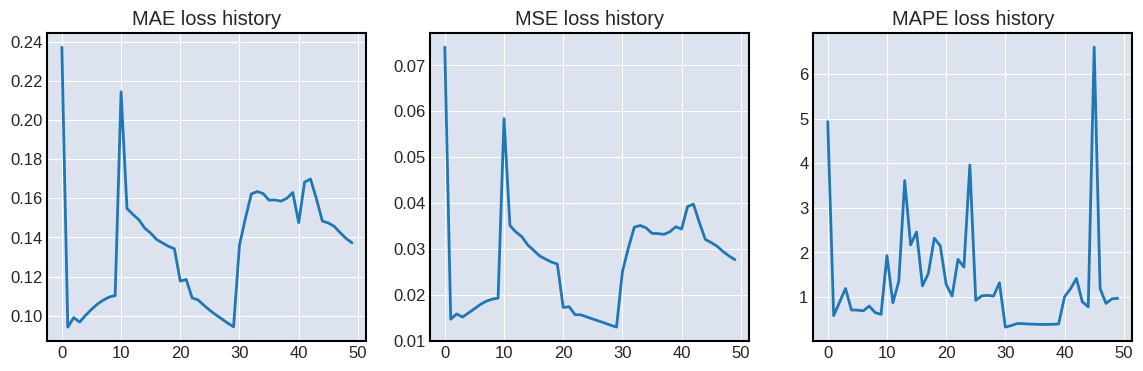

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

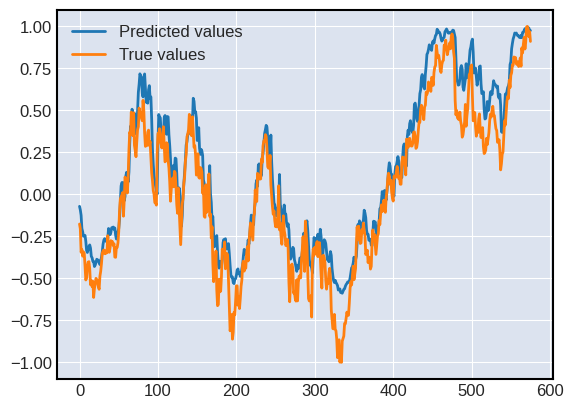

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model11(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model12 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model12.parameters(), lr=1e-3)
print(model12)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model12.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model12(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model12.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model12(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0087, Test Loss: 0.0252, MAE: 0.1266, MSE: 0.0252, MAPE: 0.5840
Epoch [10/10] - Training Loss: 0.0080, Test Loss: 0.0232, MAE: 0.1243, MSE: 0.0232, MAPE: 0.4587
Epoch [5/10] - Training Loss: 0.0036, Test Loss: 0.0641, MAE: 0.2114, MSE: 0.0641, MAPE: 1.0369
Epoch [10/10] - Training Loss: 0.0032, Test Loss: 0.0493, MAE: 0.1890, MSE: 0.0493, MAPE: 0.9360
Epoch [5/10] - Training Loss: 0.0016, Test Loss: 0.0599, MAE: 0.2225, MSE: 0.0599, MAPE: 1.7539
Epoch [10/10] - Training Loss: 0.0018, Test Loss: 0.0550, MAE: 0.2092, MSE: 0.0550, MAPE: 0.7191
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0311, MAE: 0.1412, MSE: 0.0311, MAPE: 0.9020
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0260, MAE: 0.1298, MSE: 0.0260, MAPE: 0.5509
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0309, MAE: 0.1507, MSE: 0.0309, MAPE: 0.8694
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0287, MAE: 0.1468, MSE: 0.0287, MAPE: 6.3726


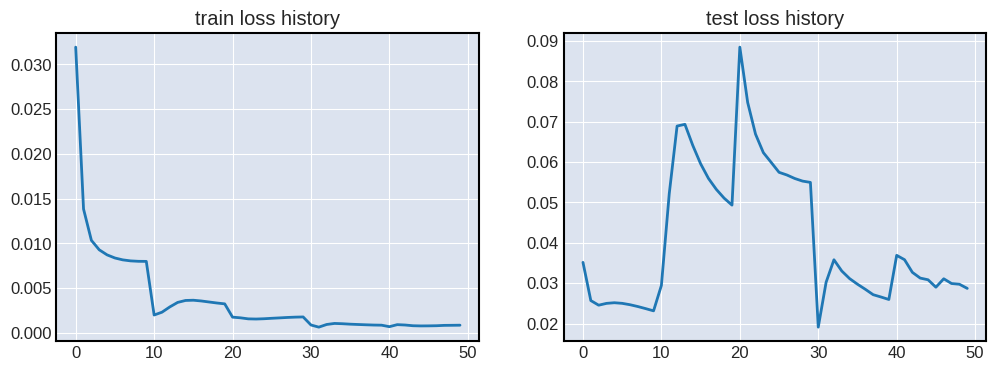

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

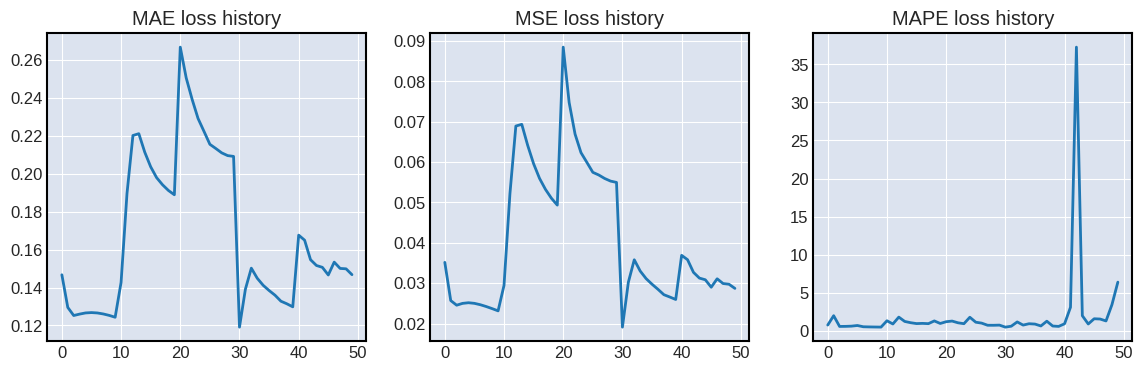

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

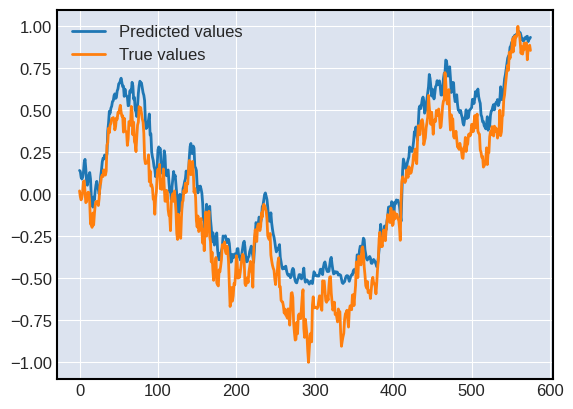

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model12(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model13 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model13.parameters(), lr=1e-3)
print(model13)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model13.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model13(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model13.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model13(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0062, Test Loss: 0.0253, MAE: 0.1183, MSE: 0.0253, MAPE: 0.7510
Epoch [10/10] - Training Loss: 0.0056, Test Loss: 0.0374, MAE: 0.1510, MSE: 0.0374, MAPE: 0.7990
Epoch [5/10] - Training Loss: 0.0025, Test Loss: 0.0529, MAE: 0.1809, MSE: 0.0529, MAPE: 0.6065
Epoch [10/10] - Training Loss: 0.0025, Test Loss: 0.0514, MAE: 0.1808, MSE: 0.0514, MAPE: 0.9961
Epoch [5/10] - Training Loss: 0.0012, Test Loss: 0.0336, MAE: 0.1617, MSE: 0.0336, MAPE: 0.3606
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0292, MAE: 0.1492, MSE: 0.0292, MAPE: 0.3239
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0573, MAE: 0.2176, MSE: 0.0573, MAPE: 0.7244
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0486, MAE: 0.2012, MSE: 0.0486, MAPE: 0.3705
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0226, MAE: 0.1255, MSE: 0.0226, MAPE: 1.1519
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0210, MAE: 0.1189, MSE: 0.0210, MAPE: 1.3646


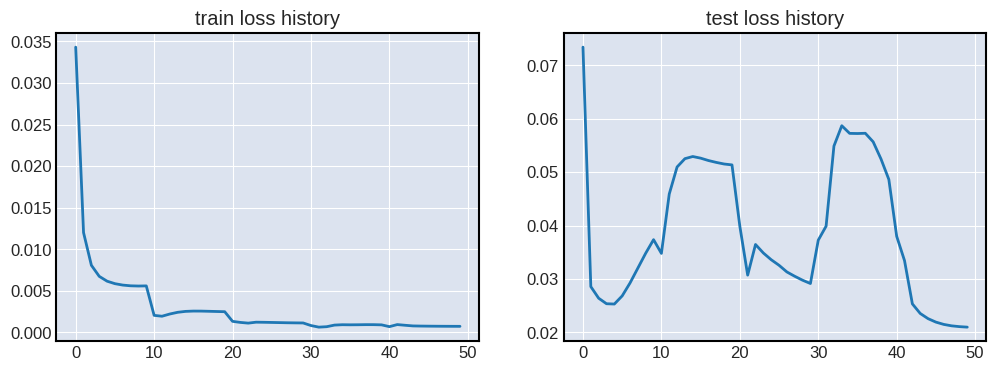

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

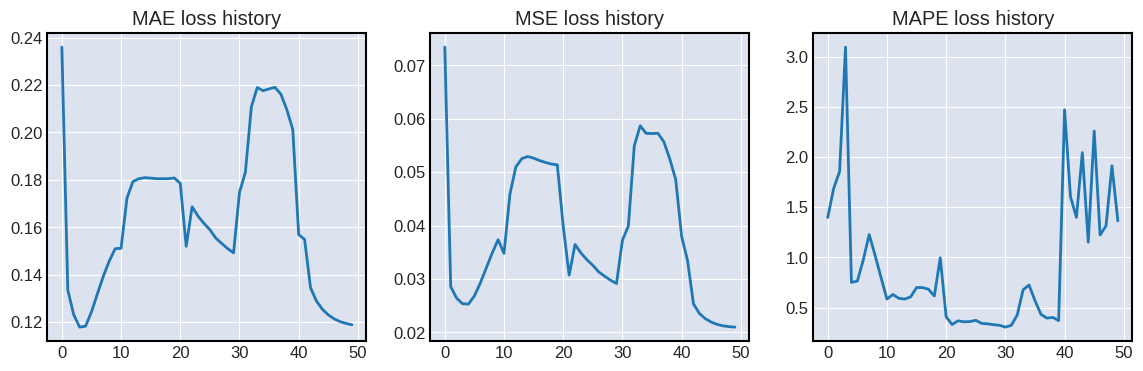

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

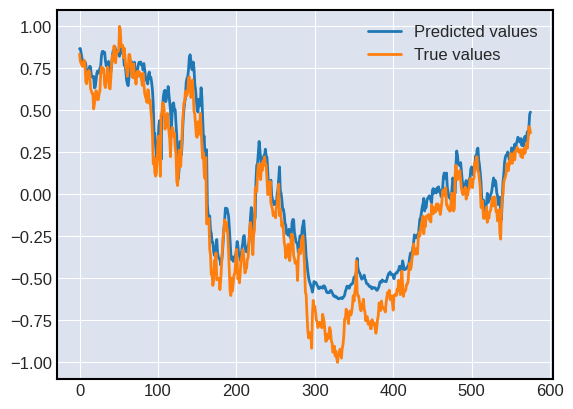

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model13(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model14 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model14.parameters(), lr=1e-3)
print(model14)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model14.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model14(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model14.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model14(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.0466, MAE: 0.1490, MSE: 0.0466, MAPE: 1.3934
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.0466, MAE: 0.1490, MSE: 0.0466, MAPE: 1.3934
Epoch [5/10] - Training Loss: 0.0037, Test Loss: 0.1408, MAE: 0.2820, MSE: 0.1408, MAPE: 2.6063
Epoch [10/10] - Training Loss: 0.0023, Test Loss: 0.0848, MAE: 0.2342, MSE: 0.0848, MAPE: 0.7394
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0204, MAE: 0.1172, MSE: 0.0204, MAPE: 1.0881
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0209, MAE: 0.1188, MSE: 0.0209, MAPE: 1.4512
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0227, MAE: 0.1240, MSE: 0.0227, MAPE: 0.5596
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0201, MAE: 0.1147, MSE: 0.0201, MAPE: 0.4710
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0363, MAE: 0.1770, MSE: 0.0363, MAPE: 3.0467
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0346, MAE: 0.1720, MSE: 0.0346, MAPE: 2.7267


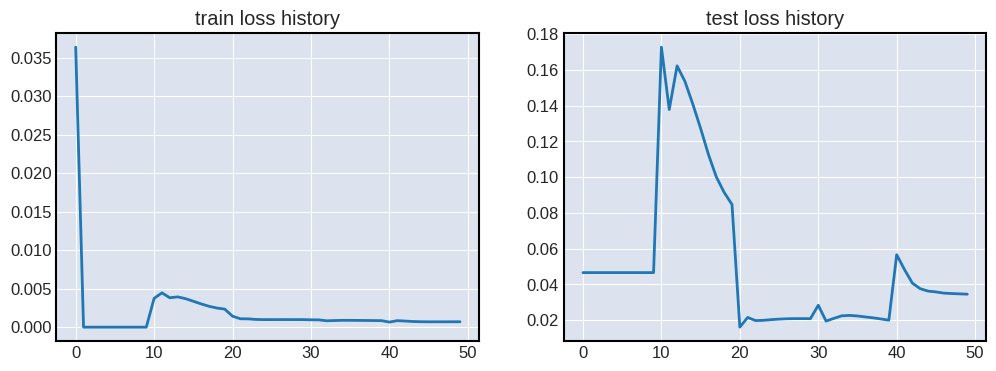

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

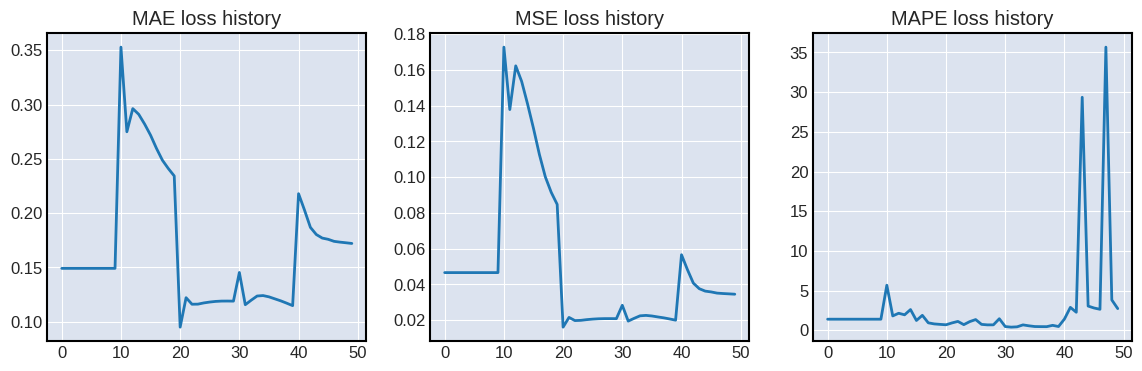

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

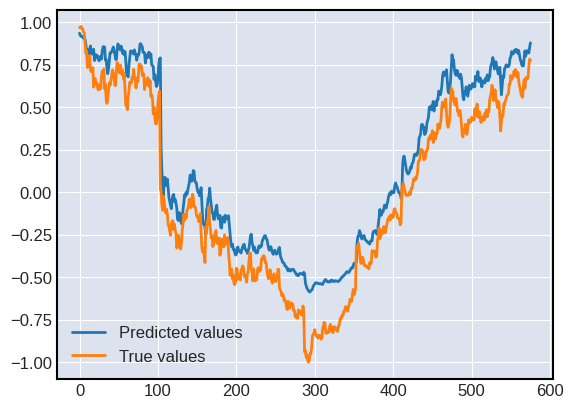

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model14(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model15 = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model15.parameters(), lr=1e-3)
print(model15)

LSTMModel(
  (lstm): LSTM(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model15.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model15(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model15.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model15(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0094, Test Loss: 0.0295, MAE: 0.1403, MSE: 0.0295, MAPE: 36.5751
Epoch [10/10] - Training Loss: 0.0092, Test Loss: 0.0303, MAE: 0.1384, MSE: 0.0303, MAPE: 0.8504
Epoch [5/10] - Training Loss: 0.0029, Test Loss: 0.0701, MAE: 0.2177, MSE: 0.0701, MAPE: 0.7426
Epoch [10/10] - Training Loss: 0.0026, Test Loss: 0.0445, MAE: 0.1842, MSE: 0.0445, MAPE: 0.5657
Epoch [5/10] - Training Loss: 0.0014, Test Loss: 0.0427, MAE: 0.1754, MSE: 0.0427, MAPE: 0.4895
Epoch [10/10] - Training Loss: 0.0014, Test Loss: 0.0399, MAE: 0.1684, MSE: 0.0399, MAPE: 0.6962
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0386, MAE: 0.1667, MSE: 0.0386, MAPE: 0.3589
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0355, MAE: 0.1593, MSE: 0.0355, MAPE: 0.3503
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0292, MAE: 0.1398, MSE: 0.0292, MAPE: 0.7487
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0264, MAE: 0.1342, MSE: 0.0264, MAPE: 0.7090


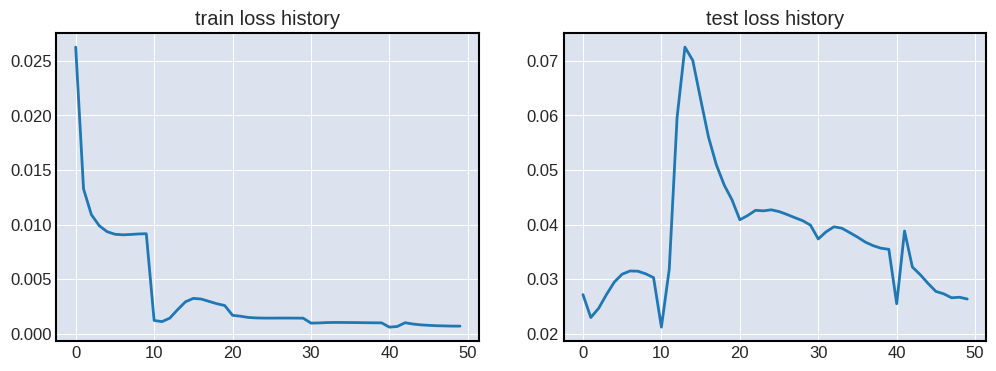

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

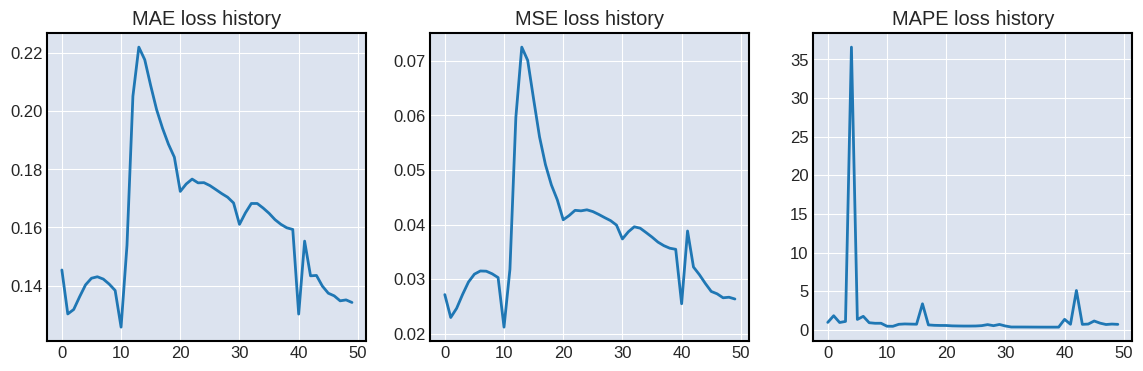

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

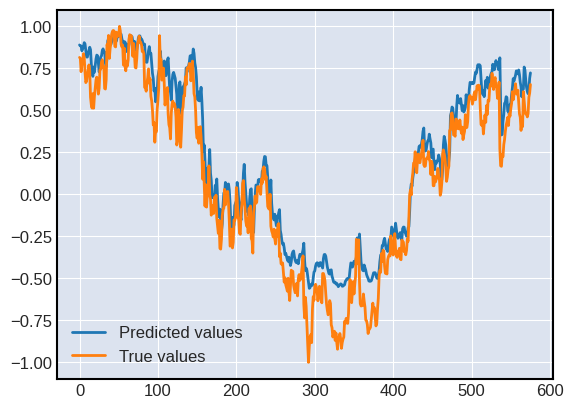

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model15(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **GRU**

In [ ]:
class GRUModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of GRU units
      # num_layers : number of GRU layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(GRUModel, self).__init__() #initializes the parent class nn.Module
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.gru(x)
        out = self.linear(out)
        return out

### **AAPL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model21 = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model21.parameters(), lr=1e-3)
print(model21)

GRUModel(
  (gru): GRU(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model21.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model21(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model21.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model21(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0025, Test Loss: 0.0155, MAE: 0.1000, MSE: 0.0155, MAPE: 0.8286
Epoch [10/10] - Training Loss: 0.0026, Test Loss: 0.0162, MAE: 0.0980, MSE: 0.0162, MAPE: 0.9410
Epoch [5/10] - Training Loss: 0.0015, Test Loss: 0.0238, MAE: 0.1256, MSE: 0.0238, MAPE: 0.9049
Epoch [10/10] - Training Loss: 0.0018, Test Loss: 0.0235, MAE: 0.1252, MSE: 0.0235, MAPE: 0.9588
Epoch [5/10] - Training Loss: 0.0014, Test Loss: 0.0131, MAE: 0.0927, MSE: 0.0131, MAPE: 1.3135
Epoch [10/10] - Training Loss: 0.0014, Test Loss: 0.0119, MAE: 0.0893, MSE: 0.0119, MAPE: 1.9439
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0313, MAE: 0.1492, MSE: 0.0313, MAPE: 0.5674
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0323, MAE: 0.1573, MSE: 0.0323, MAPE: 0.3763
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0251, MAE: 0.1308, MSE: 0.0251, MAPE: 1.4958
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0217, MAE: 0.1205, MSE: 0.0217, MAPE: 0.9835


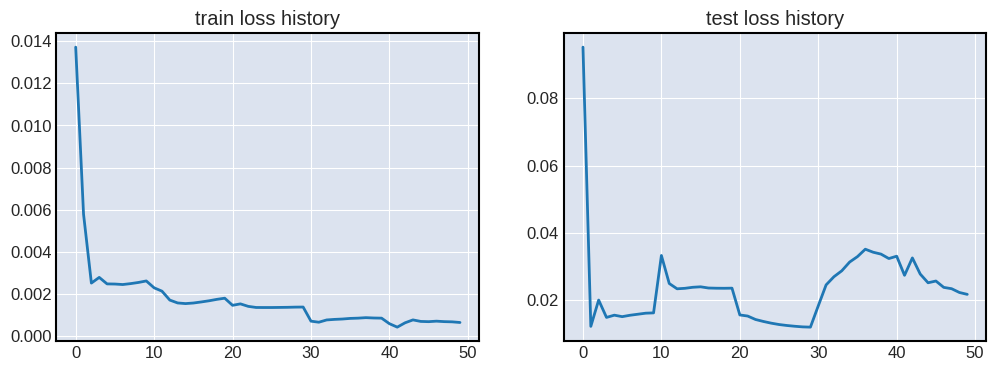

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

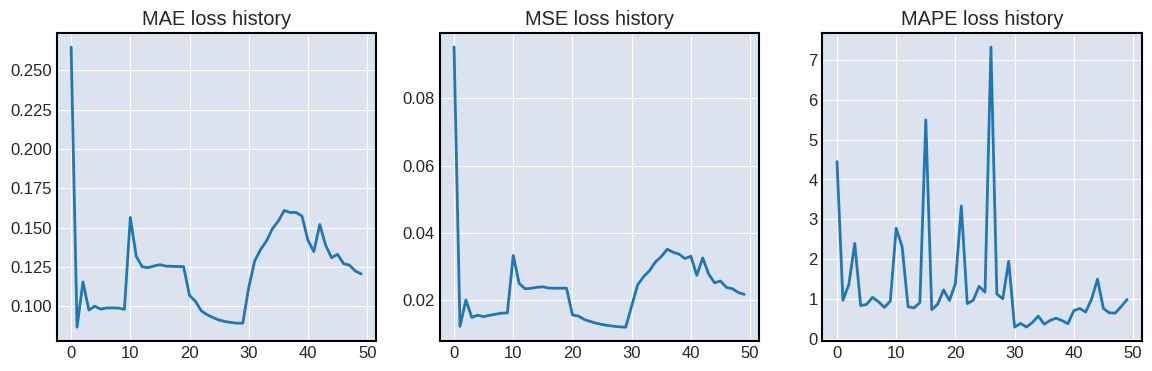

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

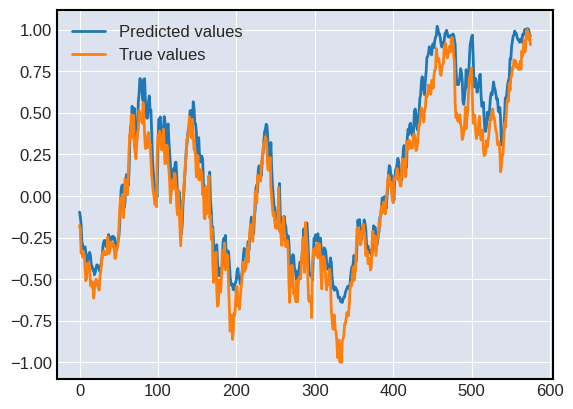

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model21(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model22 = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model22.parameters(), lr=1e-3)
print(model22)

GRUModel(
  (gru): GRU(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model22.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model22(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model22.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model22(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0085, Test Loss: 0.0261, MAE: 0.1265, MSE: 0.0261, MAPE: 0.5912
Epoch [10/10] - Training Loss: 0.0078, Test Loss: 0.0197, MAE: 0.1109, MSE: 0.0197, MAPE: 0.4064
Epoch [5/10] - Training Loss: 0.0034, Test Loss: 0.0609, MAE: 0.2003, MSE: 0.0609, MAPE: 2.5937
Epoch [10/10] - Training Loss: 0.0030, Test Loss: 0.0452, MAE: 0.1744, MSE: 0.0452, MAPE: 1.2837
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0463, MAE: 0.1928, MSE: 0.0463, MAPE: 0.8045
Epoch [10/10] - Training Loss: 0.0014, Test Loss: 0.0431, MAE: 0.1829, MSE: 0.0431, MAPE: 0.8610
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0284, MAE: 0.1315, MSE: 0.0284, MAPE: 2.2054
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0274, MAE: 0.1284, MSE: 0.0274, MAPE: 2.2300
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0239, MAE: 0.1315, MSE: 0.0239, MAPE: 0.5410
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0255, MAE: 0.1377, MSE: 0.0255, MAPE: 0.7020


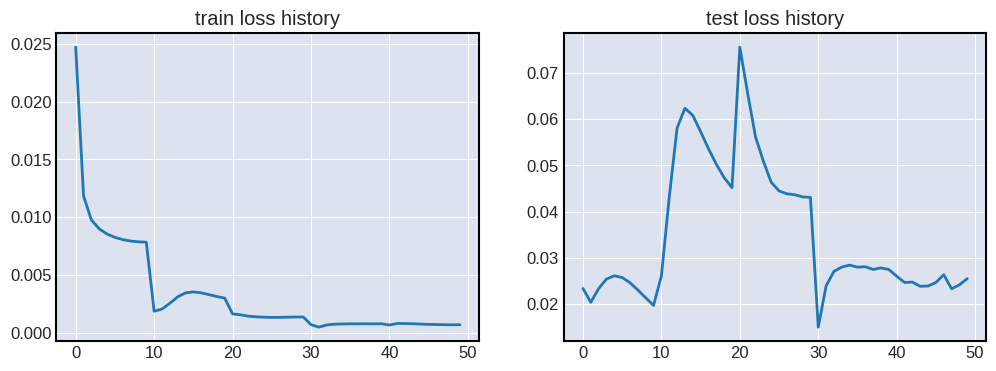

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

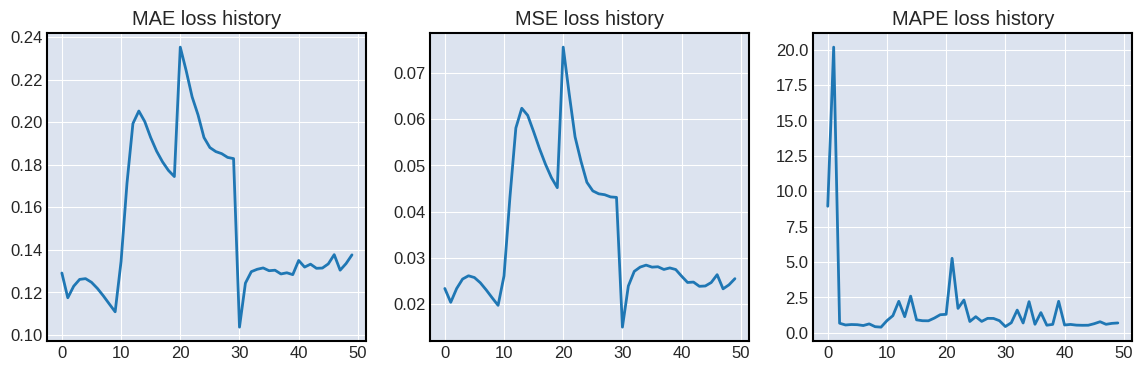

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

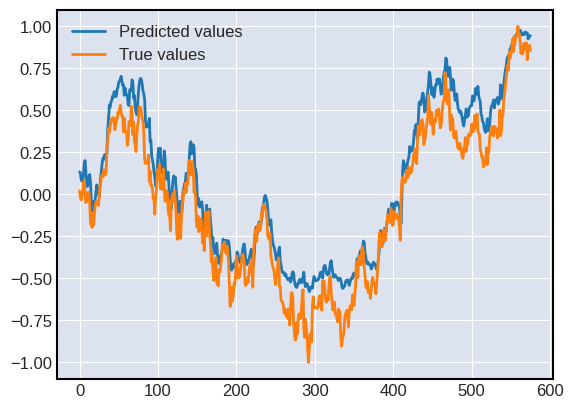

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model22(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model23 = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model23.parameters(), lr=1e-3)
print(model23)

GRUModel(
  (gru): GRU(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model23.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model23(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model23.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model23(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0058, Test Loss: 0.0240, MAE: 0.1222, MSE: 0.0240, MAPE: 0.8242
Epoch [10/10] - Training Loss: 0.0052, Test Loss: 0.0273, MAE: 0.1250, MSE: 0.0273, MAPE: 0.6886
Epoch [5/10] - Training Loss: 0.0023, Test Loss: 0.0513, MAE: 0.1780, MSE: 0.0513, MAPE: 0.6615
Epoch [10/10] - Training Loss: 0.0025, Test Loss: 0.0480, MAE: 0.1727, MSE: 0.0480, MAPE: 0.5186
Epoch [5/10] - Training Loss: 0.0011, Test Loss: 0.0282, MAE: 0.1462, MSE: 0.0282, MAPE: 0.3215
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0240, MAE: 0.1342, MSE: 0.0240, MAPE: 0.2952
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0427, MAE: 0.1868, MSE: 0.0427, MAPE: 0.3385
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0407, MAE: 0.1820, MSE: 0.0407, MAPE: 0.3771
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0256, MAE: 0.1308, MSE: 0.0256, MAPE: 0.8979
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0229, MAE: 0.1214, MSE: 0.0229, MAPE: 1.4440


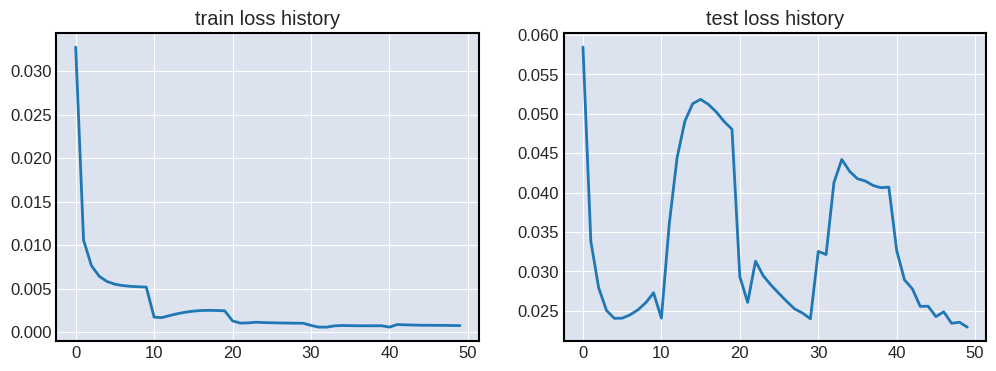

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

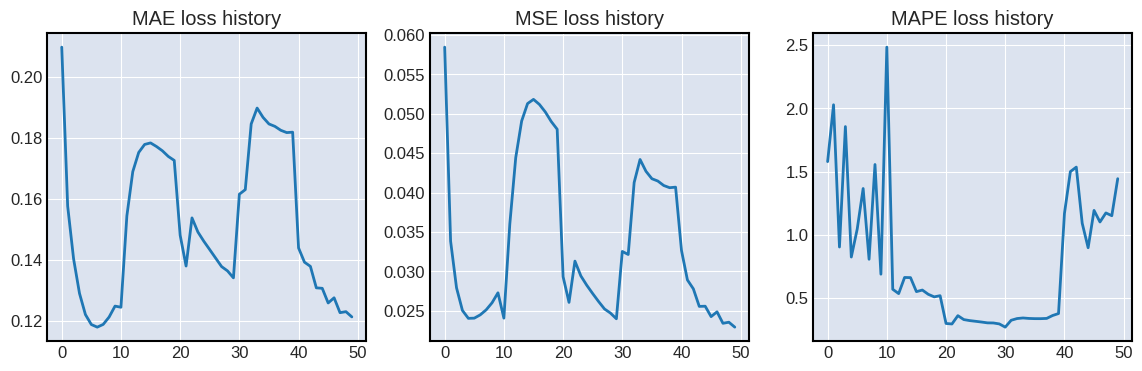

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

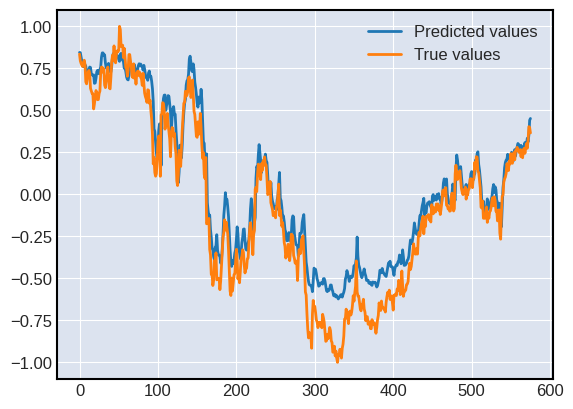

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model23(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model24 = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model24.parameters(), lr=1e-3)
print(model24)

GRUModel(
  (gru): GRU(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model24.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model24(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model24.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model24(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.0259, MAE: 0.1240, MSE: 0.0259, MAPE: 0.8658
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.0259, MAE: 0.1240, MSE: 0.0259, MAPE: 0.8658
Epoch [5/10] - Training Loss: 0.0035, Test Loss: 0.1638, MAE: 0.3063, MSE: 0.1638, MAPE: 1.9782
Epoch [10/10] - Training Loss: 0.0028, Test Loss: 0.0998, MAE: 0.2461, MSE: 0.0998, MAPE: 0.9844
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0184, MAE: 0.1091, MSE: 0.0184, MAPE: 0.7426
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0190, MAE: 0.1110, MSE: 0.0190, MAPE: 0.8684
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0195, MAE: 0.1139, MSE: 0.0195, MAPE: 0.4650
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0190, MAE: 0.1116, MSE: 0.0190, MAPE: 0.5064
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0320, MAE: 0.1612, MSE: 0.0320, MAPE: 0.9368
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0319, MAE: 0.1601, MSE: 0.0319, MAPE: 0.7563


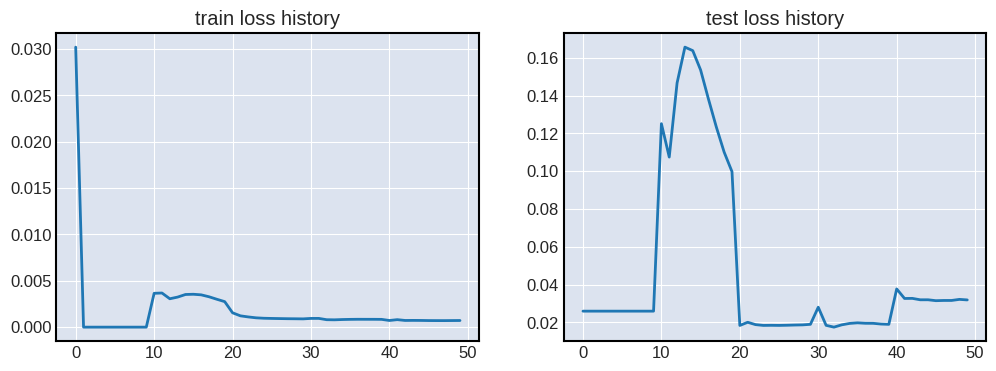

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

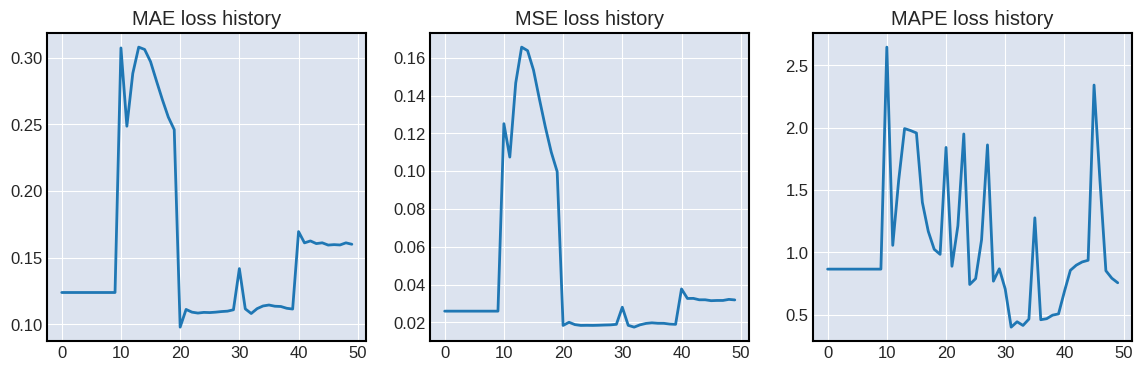

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

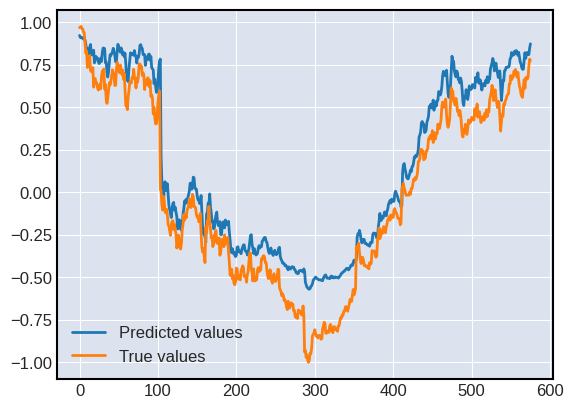

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model24(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model25 = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model25.parameters(), lr=1e-3)
print(model25)

GRUModel(
  (gru): GRU(10, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model25.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model25(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model25.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model25(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0089, Test Loss: 0.0392, MAE: 0.1605, MSE: 0.0392, MAPE: 1.1120
Epoch [10/10] - Training Loss: 0.0090, Test Loss: 0.0326, MAE: 0.1449, MSE: 0.0326, MAPE: 0.9342
Epoch [5/10] - Training Loss: 0.0025, Test Loss: 0.0673, MAE: 0.2136, MSE: 0.0673, MAPE: 0.7276
Epoch [10/10] - Training Loss: 0.0027, Test Loss: 0.0405, MAE: 0.1673, MSE: 0.0405, MAPE: 1.1096
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0305, MAE: 0.1439, MSE: 0.0305, MAPE: 0.5371
Epoch [10/10] - Training Loss: 0.0012, Test Loss: 0.0296, MAE: 0.1421, MSE: 0.0296, MAPE: 0.4486
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0342, MAE: 0.1476, MSE: 0.0342, MAPE: 0.3793
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0294, MAE: 0.1367, MSE: 0.0294, MAPE: 0.3471
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0253, MAE: 0.1322, MSE: 0.0253, MAPE: 2.9477
Epoch [10/10] - Training Loss: 0.0006, Test Loss: 0.0252, MAE: 0.1315, MSE: 0.0252, MAPE: 0.6722


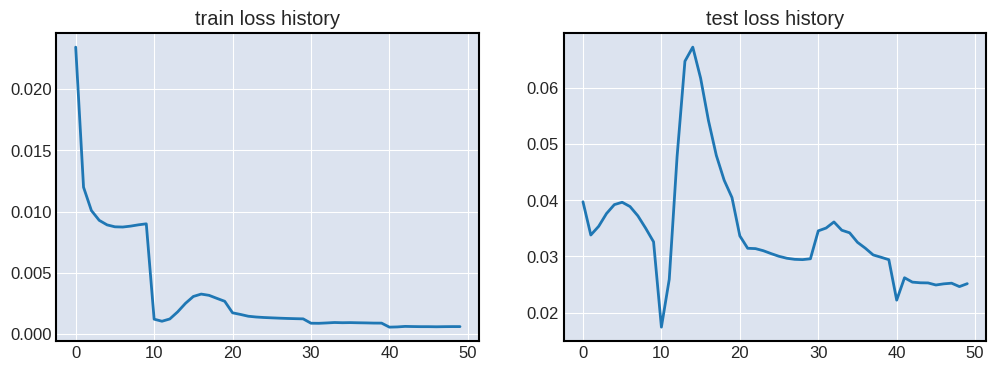

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

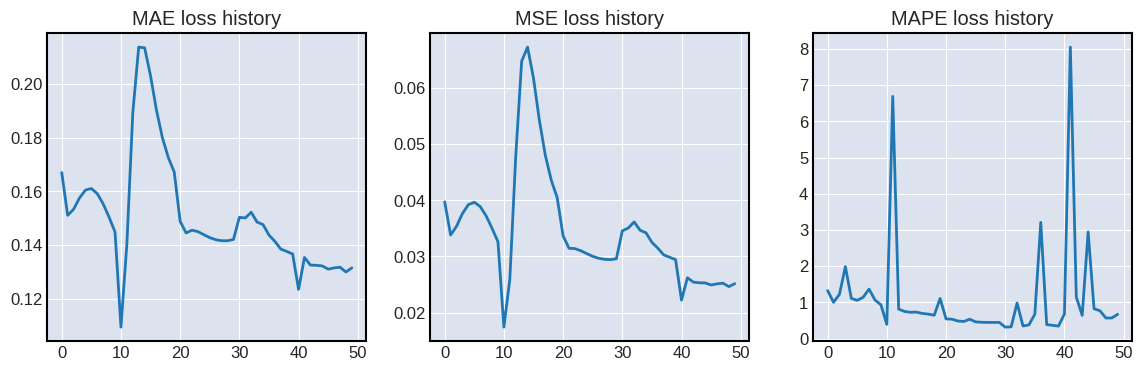

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

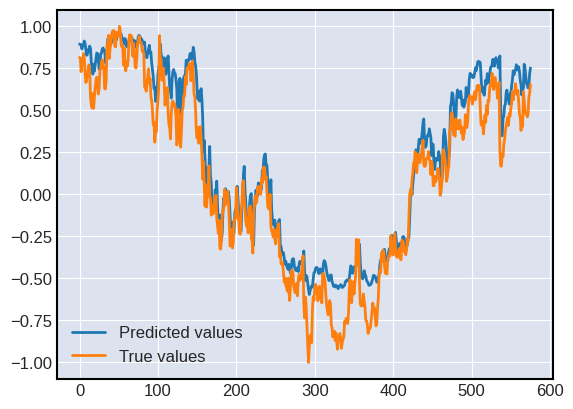

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model25(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **Bi-LSTM**

In [ ]:
class BiLSTMModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of BiLSTMModel units
      # num_layers : number of BiLSTMModel layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(BiLSTMModel, self).__init__() #initializes the parent class nn.Module
        self.bilstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(2*hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.bilstm(x)
        out = self.linear(out)
        return out

### **AAPL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model31 = BiLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model31.parameters(), lr=1e-3)
print(model31)

BiLSTMModel(
  (bilstm): LSTM(10, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model31.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model31(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model31.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model31(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0027, Test Loss: 0.0168, MAE: 0.1044, MSE: 0.0168, MAPE: 13.4962
Epoch [10/10] - Training Loss: 0.0029, Test Loss: 0.0178, MAE: 0.1037, MSE: 0.0178, MAPE: 0.7239
Epoch [5/10] - Training Loss: 0.0018, Test Loss: 0.0310, MAE: 0.1491, MSE: 0.0310, MAPE: 1.7937
Epoch [10/10] - Training Loss: 0.0019, Test Loss: 0.0330, MAE: 0.1517, MSE: 0.0330, MAPE: 1.3509
Epoch [5/10] - Training Loss: 0.0015, Test Loss: 0.0163, MAE: 0.1122, MSE: 0.0163, MAPE: 1.6104
Epoch [10/10] - Training Loss: 0.0016, Test Loss: 0.0160, MAE: 0.1076, MSE: 0.0160, MAPE: 4.1772
Epoch [5/10] - Training Loss: 0.0011, Test Loss: 0.0392, MAE: 0.1764, MSE: 0.0392, MAPE: 0.5196
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0356, MAE: 0.1669, MSE: 0.0356, MAPE: 0.5165


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

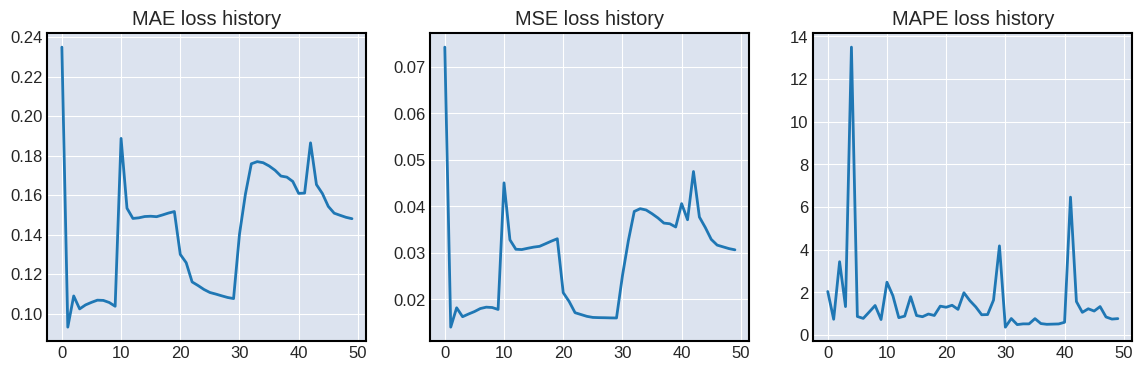

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

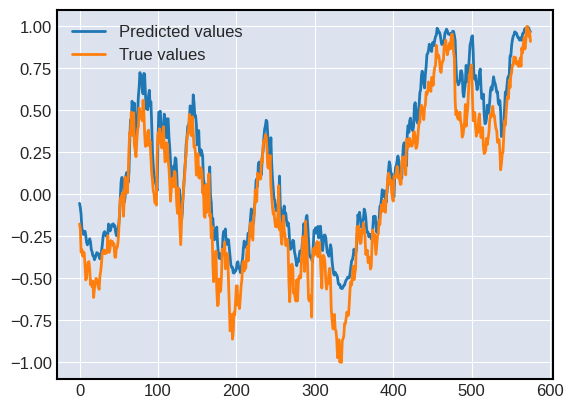

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model31(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model32 = BiLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model32.parameters(), lr=1e-3)
print(model32)

BiLSTMModel(
  (bilstm): LSTM(10, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model32.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model32(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model32.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model32(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0091, Test Loss: 0.0369, MAE: 0.1503, MSE: 0.0369, MAPE: 0.6998
Epoch [10/10] - Training Loss: 0.0084, Test Loss: 0.0302, MAE: 0.1388, MSE: 0.0302, MAPE: 0.5143
Epoch [5/10] - Training Loss: 0.0041, Test Loss: 0.0704, MAE: 0.2175, MSE: 0.0704, MAPE: 1.0427
Epoch [10/10] - Training Loss: 0.0034, Test Loss: 0.0536, MAE: 0.1953, MSE: 0.0536, MAPE: 0.9180
Epoch [5/10] - Training Loss: 0.0015, Test Loss: 0.0691, MAE: 0.2348, MSE: 0.0691, MAPE: 1.2601
Epoch [10/10] - Training Loss: 0.0015, Test Loss: 0.0657, MAE: 0.2260, MSE: 0.0657, MAPE: 1.6295
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0377, MAE: 0.1509, MSE: 0.0377, MAPE: 1.7792
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0318, MAE: 0.1391, MSE: 0.0318, MAPE: 1.2991
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0367, MAE: 0.1653, MSE: 0.0367, MAPE: 1.2533
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0336, MAE: 0.1583, MSE: 0.0336, MAPE: 2.5558


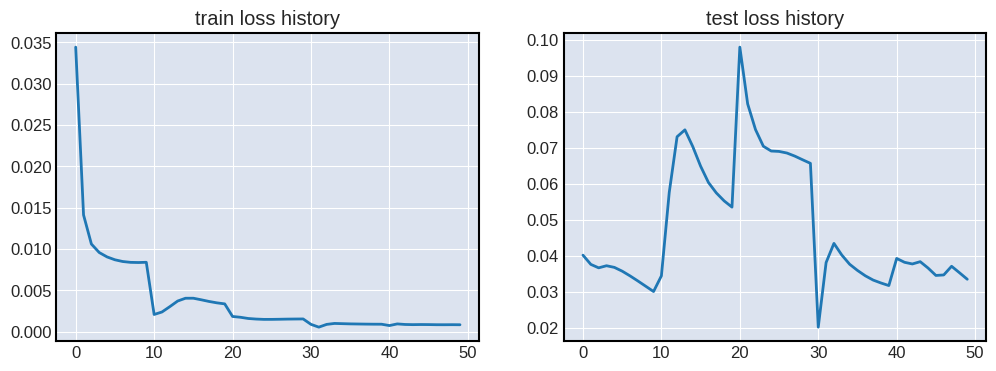

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

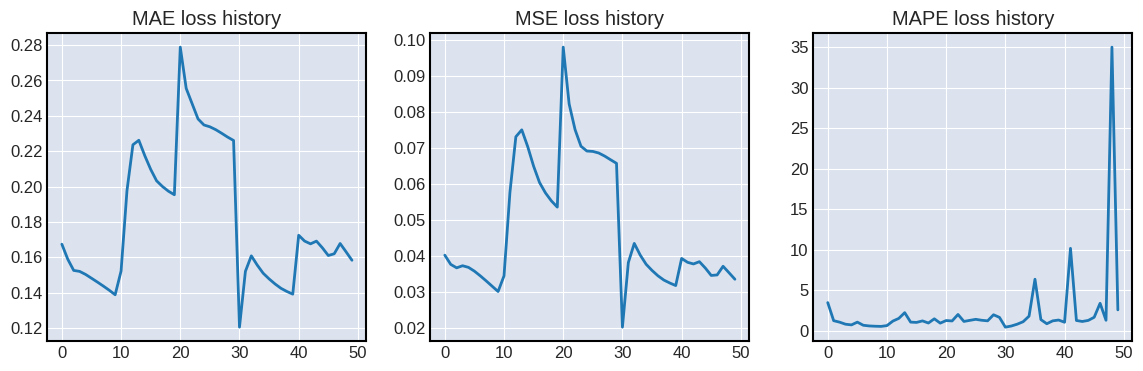

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

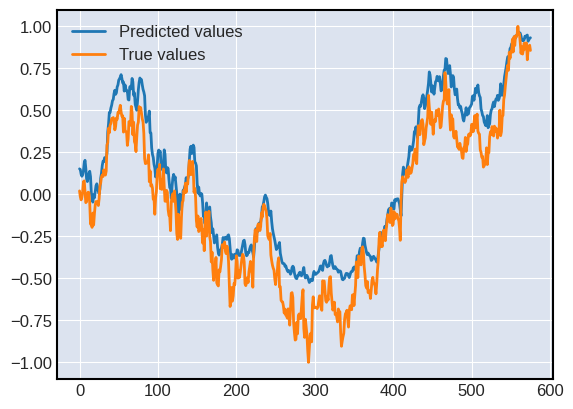

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model32(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model33 = BiLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model33.parameters(), lr=1e-3)
print(model33)

BiLSTMModel(
  (bilstm): LSTM(10, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model33.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model33(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model33.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model33(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0060, Test Loss: 0.0266, MAE: 0.1264, MSE: 0.0266, MAPE: 1.3063
Epoch [10/10] - Training Loss: 0.0056, Test Loss: 0.0366, MAE: 0.1498, MSE: 0.0366, MAPE: 1.0454
Epoch [5/10] - Training Loss: 0.0026, Test Loss: 0.0550, MAE: 0.1835, MSE: 0.0550, MAPE: 0.8882
Epoch [10/10] - Training Loss: 0.0025, Test Loss: 0.0493, MAE: 0.1769, MSE: 0.0493, MAPE: 0.9268
Epoch [5/10] - Training Loss: 0.0012, Test Loss: 0.0345, MAE: 0.1626, MSE: 0.0345, MAPE: 0.3431
Epoch [10/10] - Training Loss: 0.0012, Test Loss: 0.0317, MAE: 0.1548, MSE: 0.0317, MAPE: 0.3206
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0543, MAE: 0.2094, MSE: 0.0543, MAPE: 0.4138
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0494, MAE: 0.2015, MSE: 0.0494, MAPE: 0.8626
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0291, MAE: 0.1439, MSE: 0.0291, MAPE: 1.4557
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0287, MAE: 0.1423, MSE: 0.0287, MAPE: 1.6275


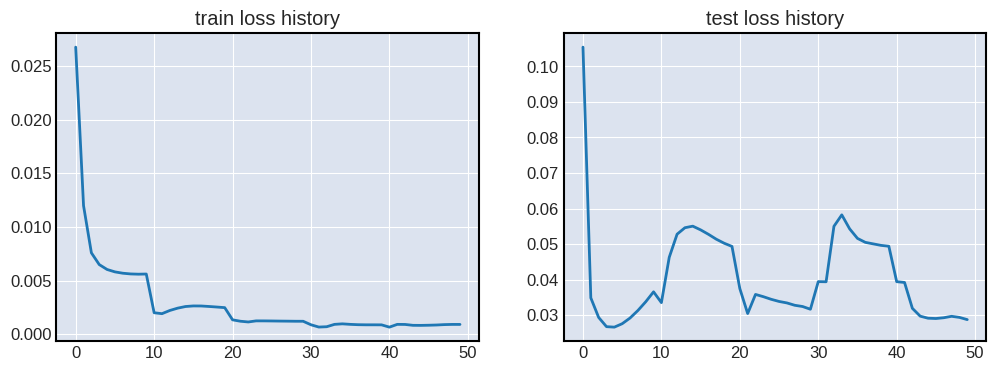

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

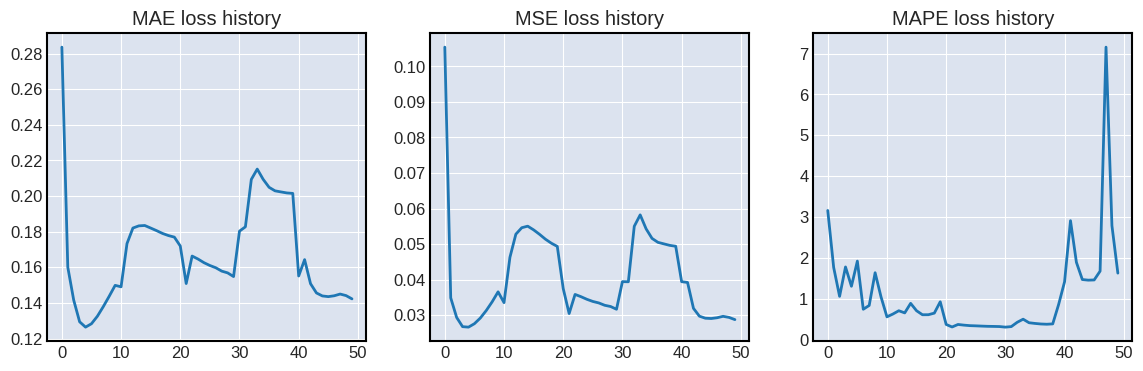

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

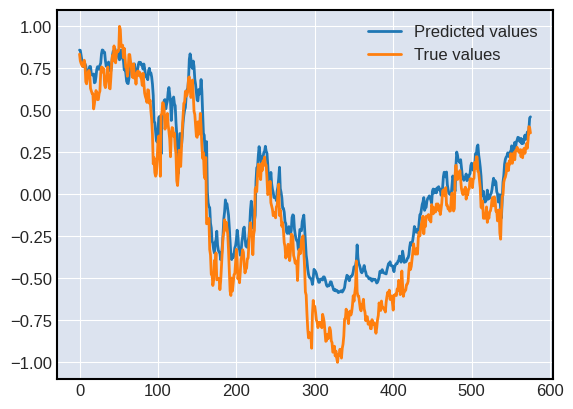

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model33(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model34 = BiLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model34.parameters(), lr=1e-3)
print(model34)

BiLSTMModel(
  (bilstm): LSTM(10, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model34.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model34(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model34.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model34(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.0832, MAE: 0.2150, MSE: 0.0832, MAPE: 5.0298
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.0832, MAE: 0.2150, MSE: 0.0832, MAPE: 5.0298
Epoch [5/10] - Training Loss: 0.0036, Test Loss: 0.1503, MAE: 0.3052, MSE: 0.1503, MAPE: 1.6025
Epoch [10/10] - Training Loss: 0.0025, Test Loss: 0.0912, MAE: 0.2517, MSE: 0.0912, MAPE: 0.8272
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0211, MAE: 0.1223, MSE: 0.0211, MAPE: 0.8564
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0212, MAE: 0.1209, MSE: 0.0212, MAPE: 1.2322
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0210, MAE: 0.1197, MSE: 0.0210, MAPE: 0.4446
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0190, MAE: 0.1122, MSE: 0.0190, MAPE: 0.5421
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0484, MAE: 0.2063, MSE: 0.0484, MAPE: 6.1695
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0399, MAE: 0.1870, MSE: 0.0399, MAPE: 3.0811


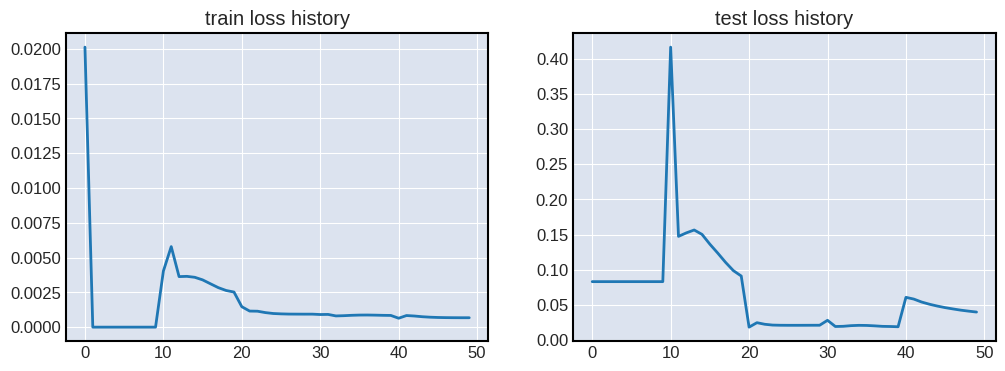

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

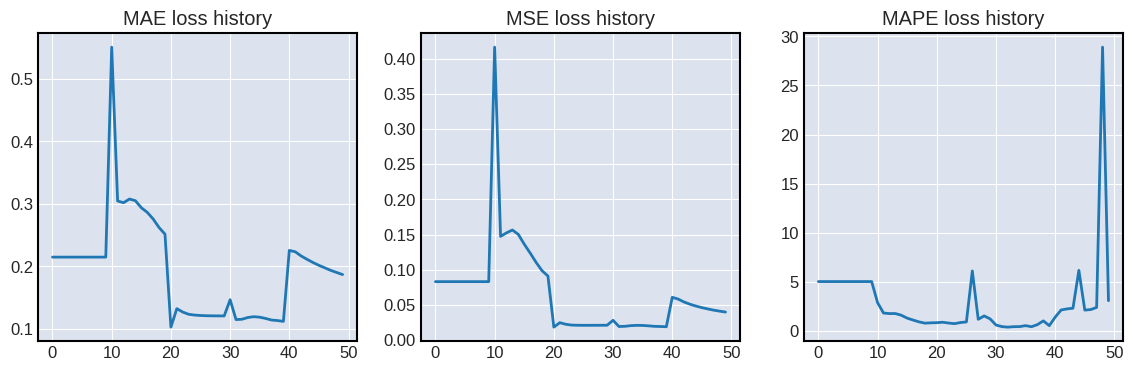

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

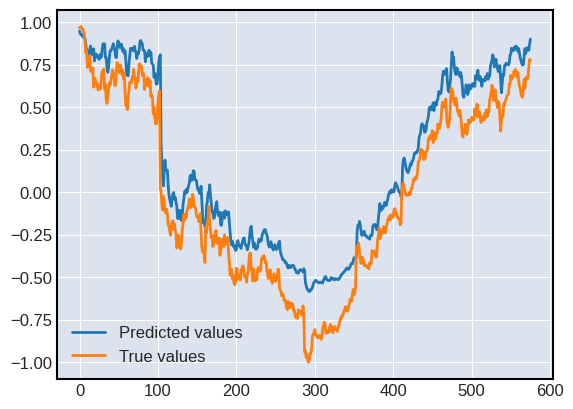

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model34(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model35 = BiLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model35.parameters(), lr=1e-3)
print(model35)

BiLSTMModel(
  (bilstm): LSTM(10, 50, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model35.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model35(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model35.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model35(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0092, Test Loss: 0.0420, MAE: 0.1672, MSE: 0.0420, MAPE: 1.3281
Epoch [10/10] - Training Loss: 0.0095, Test Loss: 0.0362, MAE: 0.1495, MSE: 0.0362, MAPE: 1.0258
Epoch [5/10] - Training Loss: 0.0031, Test Loss: 0.0837, MAE: 0.2379, MSE: 0.0837, MAPE: 1.1133
Epoch [10/10] - Training Loss: 0.0029, Test Loss: 0.0513, MAE: 0.1959, MSE: 0.0513, MAPE: 0.7139
Epoch [5/10] - Training Loss: 0.0015, Test Loss: 0.0443, MAE: 0.1786, MSE: 0.0443, MAPE: 0.5200
Epoch [10/10] - Training Loss: 0.0015, Test Loss: 0.0421, MAE: 0.1724, MSE: 0.0421, MAPE: 0.4980
Epoch [5/10] - Training Loss: 0.0011, Test Loss: 0.0398, MAE: 0.1687, MSE: 0.0398, MAPE: 0.3677
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0383, MAE: 0.1662, MSE: 0.0383, MAPE: 0.3893
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0320, MAE: 0.1494, MSE: 0.0320, MAPE: 0.8628
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0269, MAE: 0.1361, MSE: 0.0269, MAPE: 0.6550


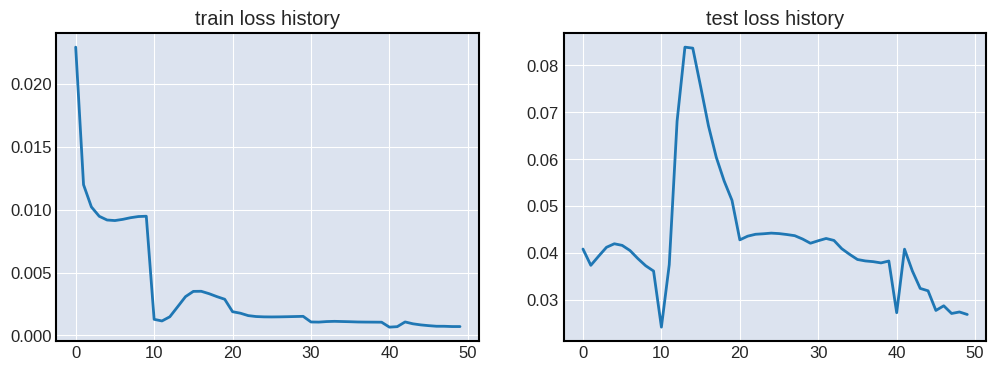

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

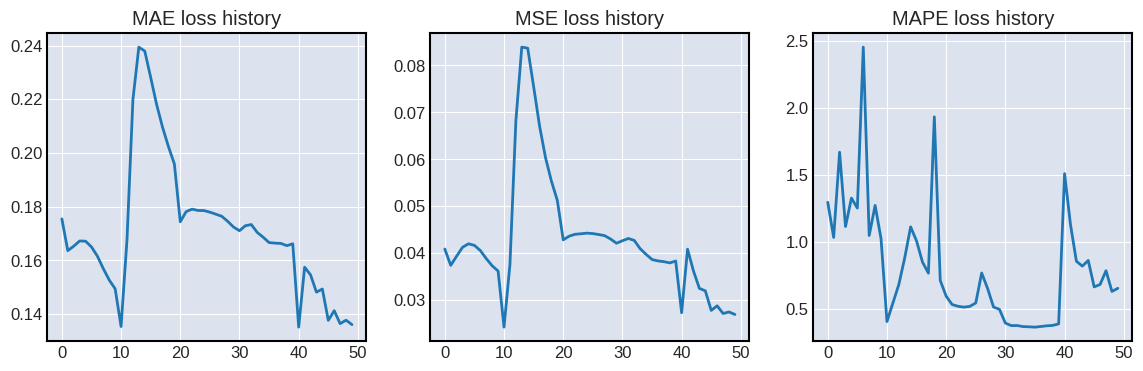

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

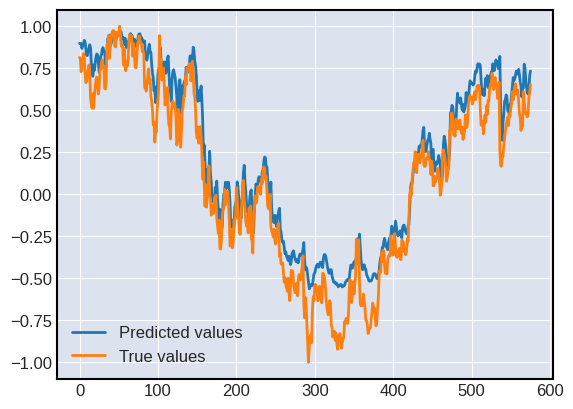

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model35(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **MLP**

In [ ]:
class MLPModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of MLPModel units
      # num_layers : number of MLPModel layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MLPModel, self).__init__() #initializes the parent class nn.Module
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

### **AAPL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model41 = MLPModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model41.parameters(), lr=1e-3)
print(model41)

MLPModel(
  (linear1): Linear(in_features=10, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model41.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model41(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model41.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model41(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0027, Test Loss: 0.0247, MAE: 0.1299, MSE: 0.0247, MAPE: 1.8275
Epoch [10/10] - Training Loss: 0.0020, Test Loss: 0.0172, MAE: 0.1079, MSE: 0.0172, MAPE: 3.0734
Epoch [5/10] - Training Loss: 0.0017, Test Loss: 0.0224, MAE: 0.1192, MSE: 0.0224, MAPE: 2.3001
Epoch [10/10] - Training Loss: 0.0015, Test Loss: 0.0197, MAE: 0.1094, MSE: 0.0197, MAPE: 1.7468
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0304, MAE: 0.1552, MSE: 0.0304, MAPE: 2.8205
Epoch [10/10] - Training Loss: 0.0012, Test Loss: 0.0266, MAE: 0.1450, MSE: 0.0266, MAPE: 1.8232
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0346, MAE: 0.1530, MSE: 0.0346, MAPE: 1.0341
Epoch [10/10] - Training Loss: 0.0006, Test Loss: 0.0258, MAE: 0.1327, MSE: 0.0258, MAPE: 0.6393
Epoch [5/10] - Training Loss: 0.0004, Test Loss: 0.0193, MAE: 0.1081, MSE: 0.0193, MAPE: 0.9671
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0199, MAE: 0.1094, MSE: 0.0199, MAPE: 1.3454


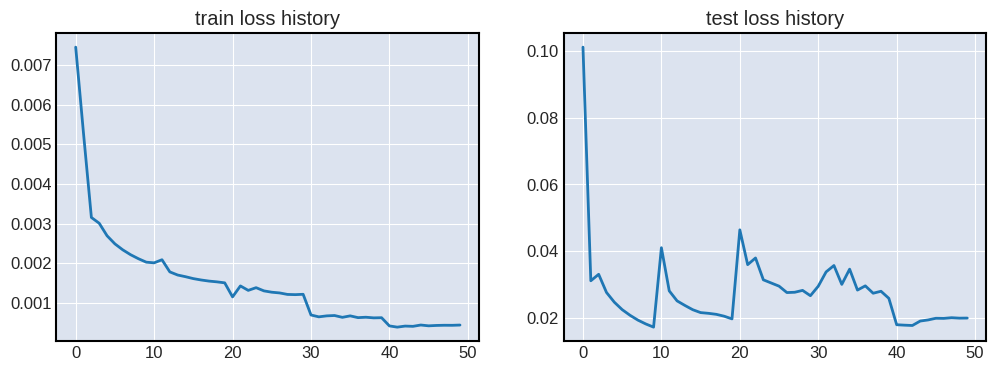

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

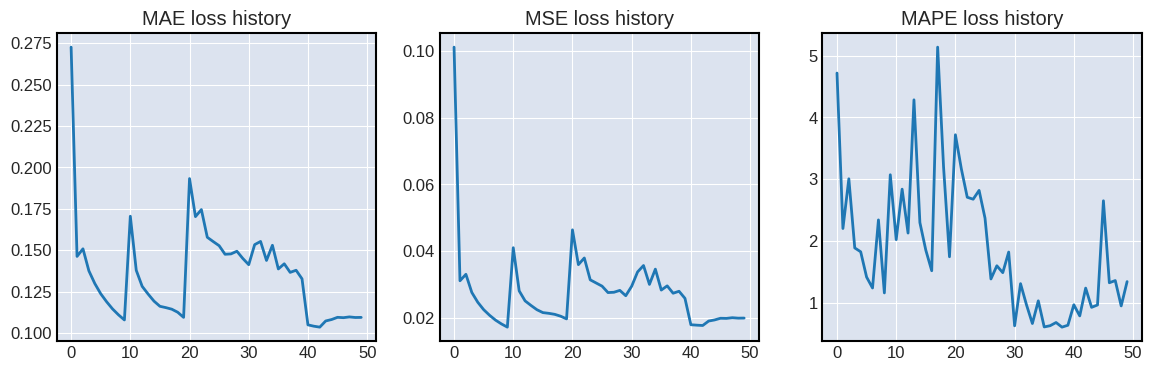

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

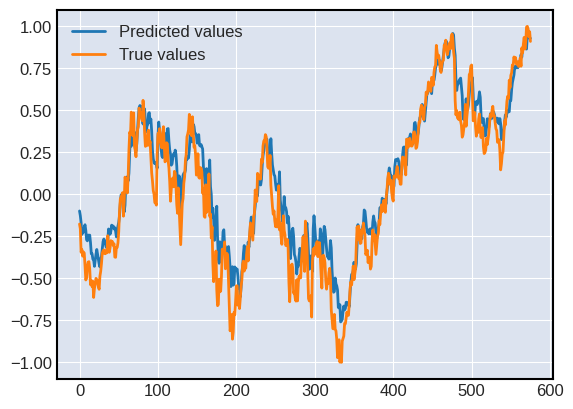

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model41(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model42 = MLPModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model42.parameters(), lr=1e-3)
print(model42)

MLPModel(
  (linear1): Linear(in_features=10, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model42.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model42(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model42.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model42(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0103, Test Loss: 0.0163, MAE: 0.1116, MSE: 0.0163, MAPE: 1.1078
Epoch [10/10] - Training Loss: 0.0088, Test Loss: 0.0093, MAE: 0.0812, MSE: 0.0093, MAPE: 0.5233
Epoch [5/10] - Training Loss: 0.0029, Test Loss: 0.0386, MAE: 0.1648, MSE: 0.0386, MAPE: 0.8585
Epoch [10/10] - Training Loss: 0.0029, Test Loss: 0.0412, MAE: 0.1773, MSE: 0.0412, MAPE: 1.0024
Epoch [5/10] - Training Loss: 0.0014, Test Loss: 0.0188, MAE: 0.1251, MSE: 0.0188, MAPE: 1.1751
Epoch [10/10] - Training Loss: 0.0013, Test Loss: 0.0134, MAE: 0.1060, MSE: 0.0134, MAPE: 13.5144
Epoch [5/10] - Training Loss: 0.0005, Test Loss: 0.0044, MAE: 0.0510, MSE: 0.0044, MAPE: 14.9556
Epoch [10/10] - Training Loss: 0.0005, Test Loss: 0.0052, MAE: 0.0584, MSE: 0.0052, MAPE: 0.9851
Epoch [5/10] - Training Loss: 0.0003, Test Loss: 0.0152, MAE: 0.0997, MSE: 0.0152, MAPE: 1.1906
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0140, MAE: 0.0959, MSE: 0.0140, MAPE: 1.0022


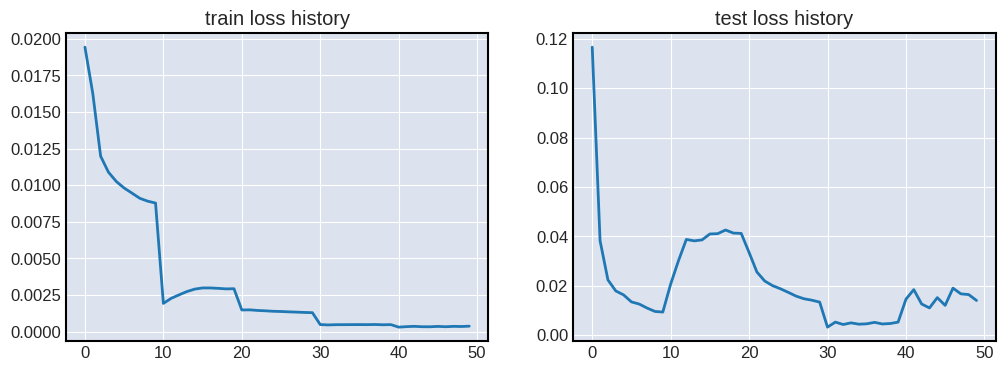

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

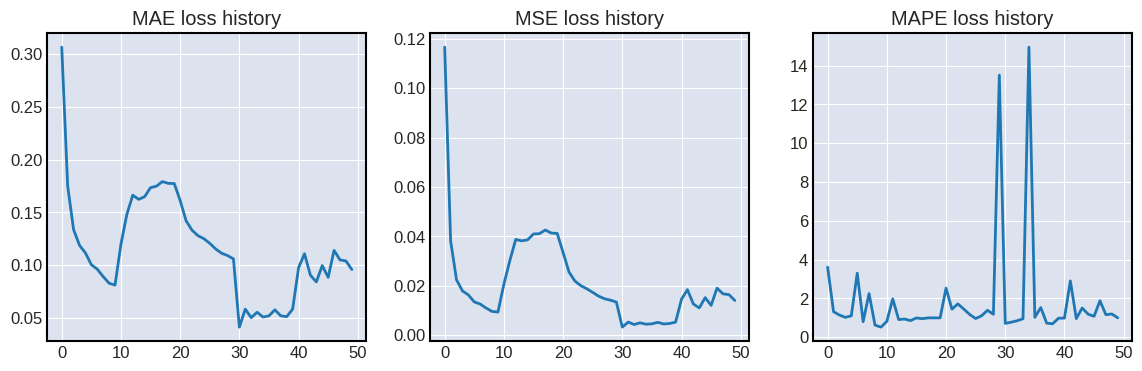

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

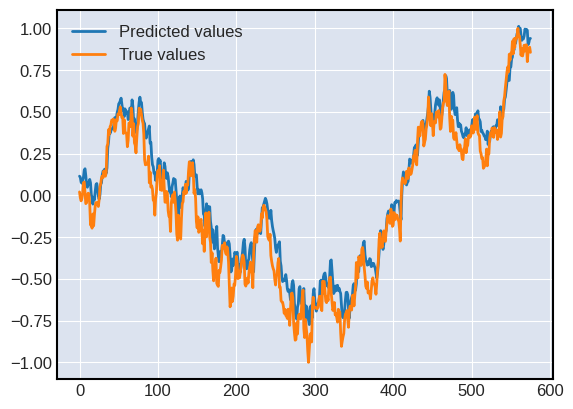

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model42(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model43 = MLPModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model43.parameters(), lr=1e-3)
print(model43)

MLPModel(
  (linear1): Linear(in_features=10, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model43.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model43(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model43.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model43(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0071, Test Loss: 0.0642, MAE: 0.2179, MSE: 0.0642, MAPE: 1.8169
Epoch [10/10] - Training Loss: 0.0061, Test Loss: 0.0444, MAE: 0.1811, MSE: 0.0444, MAPE: 1.7222
Epoch [5/10] - Training Loss: 0.0023, Test Loss: 0.0354, MAE: 0.1523, MSE: 0.0354, MAPE: 1.8708
Epoch [10/10] - Training Loss: 0.0021, Test Loss: 0.0261, MAE: 0.1312, MSE: 0.0261, MAPE: 1.7923
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0110, MAE: 0.0882, MSE: 0.0110, MAPE: 0.2826
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0105, MAE: 0.0863, MSE: 0.0105, MAPE: 0.2604
Epoch [5/10] - Training Loss: 0.0005, Test Loss: 0.0117, MAE: 0.0919, MSE: 0.0117, MAPE: 0.2059
Epoch [10/10] - Training Loss: 0.0005, Test Loss: 0.0101, MAE: 0.0852, MSE: 0.0101, MAPE: 0.1696
Epoch [5/10] - Training Loss: 0.0004, Test Loss: 0.0196, MAE: 0.1136, MSE: 0.0196, MAPE: 2.2966
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0167, MAE: 0.1032, MSE: 0.0167, MAPE: 1.4853


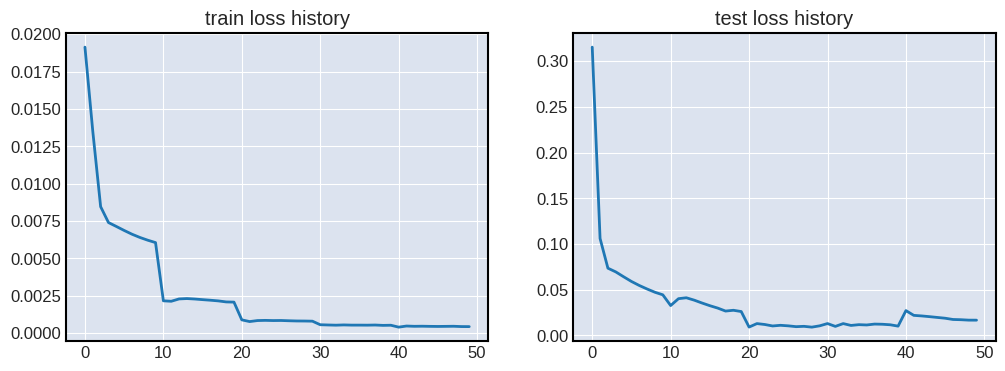

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

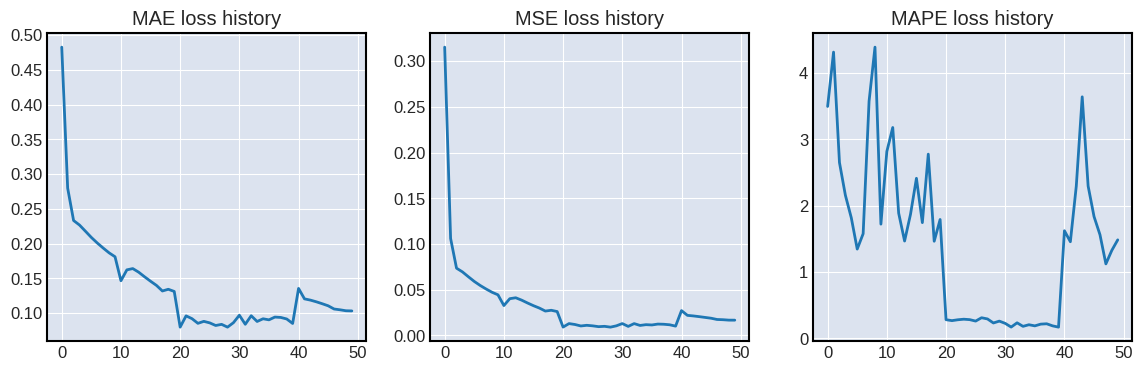

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

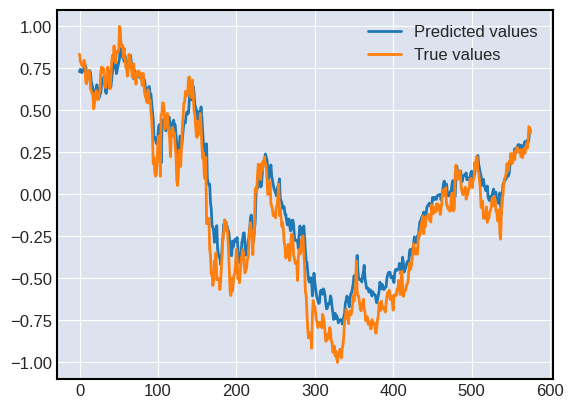

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model43(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model44 = MLPModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model44.parameters(), lr=1e-3)
print(model44)

MLPModel(
  (linear1): Linear(in_features=10, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model44.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model44(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model44.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model44(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.0453, MAE: 0.1668, MSE: 0.0453, MAPE: 0.8920
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.0453, MAE: 0.1668, MSE: 0.0453, MAPE: 0.8920
Epoch [5/10] - Training Loss: 0.0026, Test Loss: 0.0867, MAE: 0.2568, MSE: 0.0867, MAPE: 5.0080
Epoch [10/10] - Training Loss: 0.0022, Test Loss: 0.0628, MAE: 0.2168, MSE: 0.0628, MAPE: 1.8340
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0147, MAE: 0.0973, MSE: 0.0147, MAPE: 10.7005
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0129, MAE: 0.0899, MSE: 0.0129, MAPE: 1.0303
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0195, MAE: 0.1224, MSE: 0.0195, MAPE: 0.6133
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0173, MAE: 0.1145, MSE: 0.0173, MAPE: 0.7198
Epoch [5/10] - Training Loss: 0.0005, Test Loss: 0.0118, MAE: 0.0888, MSE: 0.0118, MAPE: 1.2204
Epoch [10/10] - Training Loss: 0.0005, Test Loss: 0.0144, MAE: 0.0998, MSE: 0.0144, MAPE: 0.7727


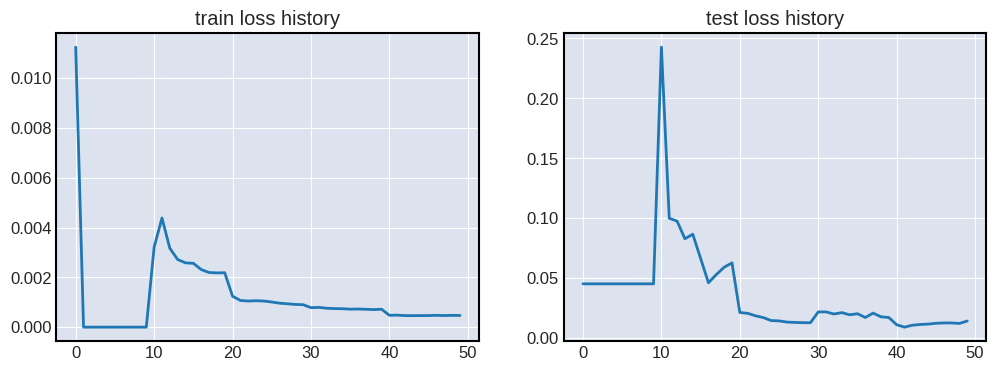

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

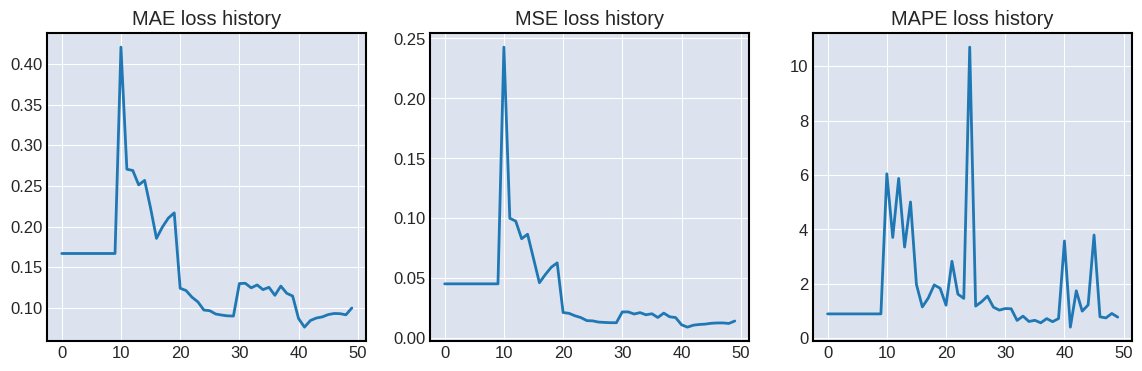

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

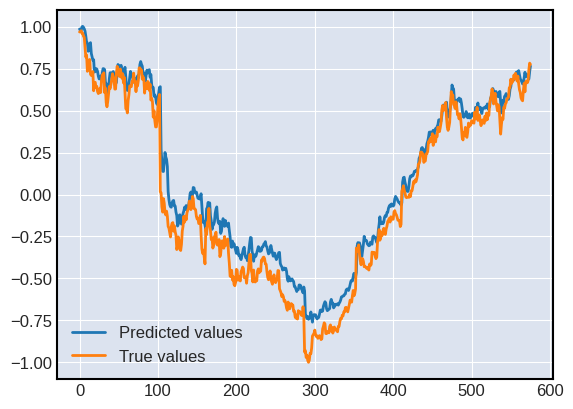

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model44(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 10
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model45 = MLPModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model45.parameters(), lr=1e-3)
print(model45)

MLPModel(
  (linear1): Linear(in_features=10, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model45.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model45(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model45.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model45(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0105, Test Loss: 0.0301, MAE: 0.1498, MSE: 0.0301, MAPE: 0.9500
Epoch [10/10] - Training Loss: 0.0093, Test Loss: 0.0233, MAE: 0.1325, MSE: 0.0233, MAPE: 0.9314
Epoch [5/10] - Training Loss: 0.0019, Test Loss: 0.0177, MAE: 0.1067, MSE: 0.0177, MAPE: 0.4720
Epoch [10/10] - Training Loss: 0.0019, Test Loss: 0.0168, MAE: 0.1040, MSE: 0.0168, MAPE: 0.5083
Epoch [5/10] - Training Loss: 0.0012, Test Loss: 0.0170, MAE: 0.1096, MSE: 0.0170, MAPE: 0.6319
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0158, MAE: 0.1055, MSE: 0.0158, MAPE: 0.5320
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0185, MAE: 0.1235, MSE: 0.0185, MAPE: 0.4883
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0163, MAE: 0.1158, MSE: 0.0163, MAPE: 0.4248
Epoch [5/10] - Training Loss: 0.0003, Test Loss: 0.0136, MAE: 0.0923, MSE: 0.0136, MAPE: 1.3485
Epoch [10/10] - Training Loss: 0.0003, Test Loss: 0.0133, MAE: 0.0916, MSE: 0.0133, MAPE: 0.7953


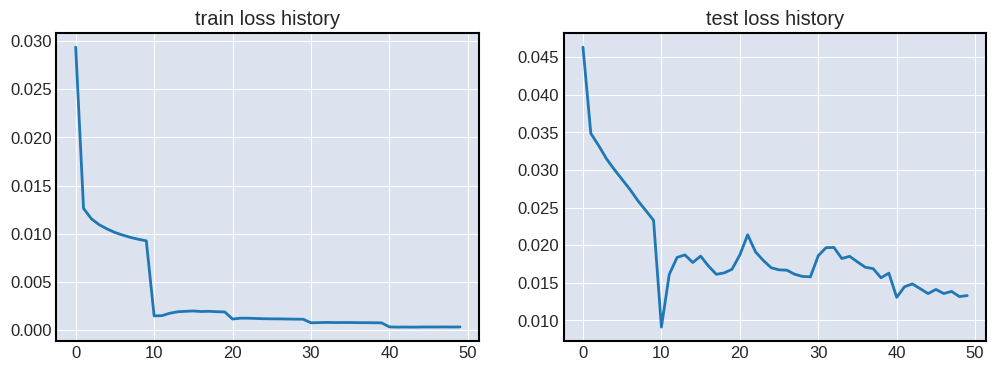

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

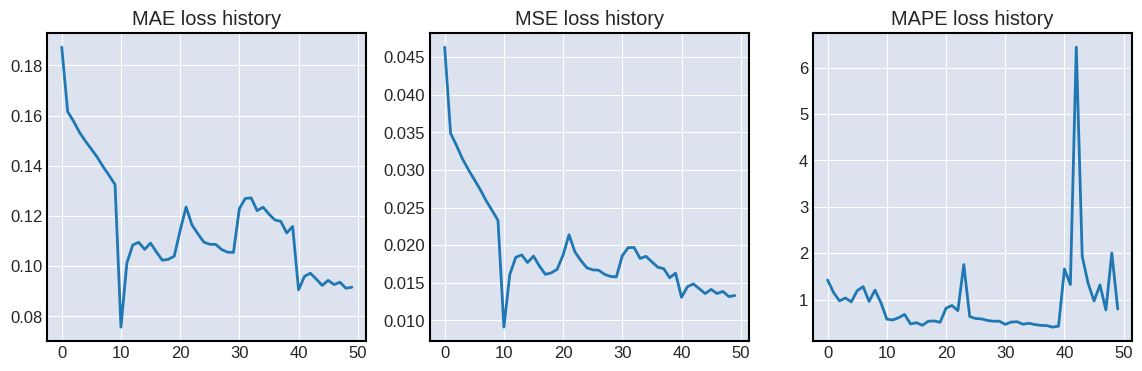

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

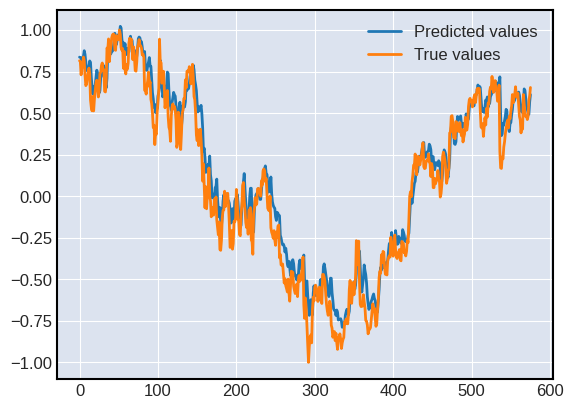

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model45(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **CNN**

In [ ]:
class CNNModel(nn.Module):
      # input_size : number of features in input at each time step
      # num_layers : number of MLPModel layers
    def __init__(self, input_size, hidden_size, output_size):
        super(CNNModel, self).__init__() #initializes the parent class nn.Module
        self.cnv = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1d = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(int(64/2*hidden_size), 32)
        self.relu2 = nn.ReLU()
        self.linear2 = nn.Linear(32, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out = self.cnv(x)
        out = self.relu1(out)
        out = self.maxpool1d(out)
        out = self.flatten(out.unsqueeze(0))
        out = self.linear1(out)
        out = self.relu2(out)
        out = self.linear2(out)
        return out

### **AAPL**

In [ ]:
input_size = 1
hidden_size = 10
output_size = 1

# Define the model, loss function, and optimizer
model51 = CNNModel(input_size, hidden_size, output_size).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model51.parameters(), lr=1e-3)
print(model51)

CNNModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=320, out_features=32, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []


# Training loop
nds = 0
for i in range(0, 5):
# split: i

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model51.train()
		for j in range(0, len(xTrain[nds][i])):
			predictions = model51(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model51.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model51(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0035, Test Loss: 0.0296, MAE: 0.1462, MSE: 0.0296, MAPE: 5.9860
Epoch [10/10] - Training Loss: 0.0028, Test Loss: 0.0252, MAE: 0.1349, MSE: 0.0252, MAPE: 1.6414
Epoch [5/10] - Training Loss: 0.0024, Test Loss: 0.0452, MAE: 0.1734, MSE: 0.0452, MAPE: 1.0327
Epoch [10/10] - Training Loss: 0.0017, Test Loss: 0.0284, MAE: 0.1351, MSE: 0.0284, MAPE: 2.5802
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0191, MAE: 0.1277, MSE: 0.0191, MAPE: 1.2127
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0168, MAE: 0.1184, MSE: 0.0168, MAPE: 1.4257
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0258, MAE: 0.1481, MSE: 0.0258, MAPE: 0.6891
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0302, MAE: 0.1609, MSE: 0.0302, MAPE: 0.5312
Epoch [5/10] - Training Loss: 0.0005, Test Loss: 0.0402, MAE: 0.1735, MSE: 0.0402, MAPE: 1.3185
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0338, MAE: 0.1539, MSE: 0.0338, MAPE: 1.4580


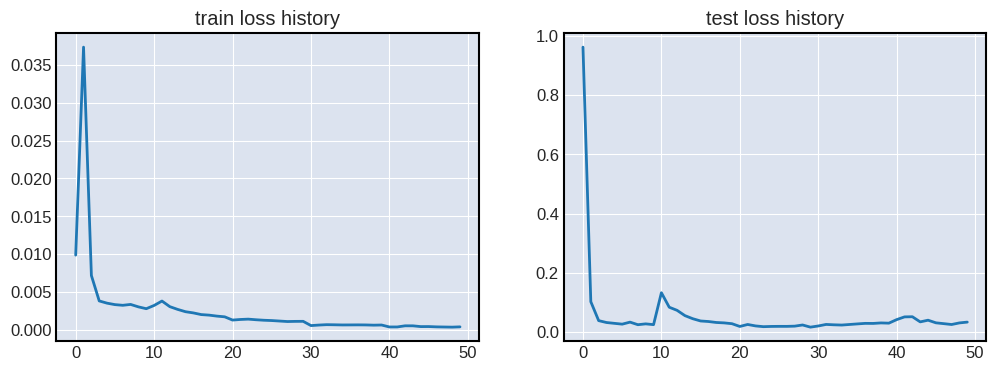

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

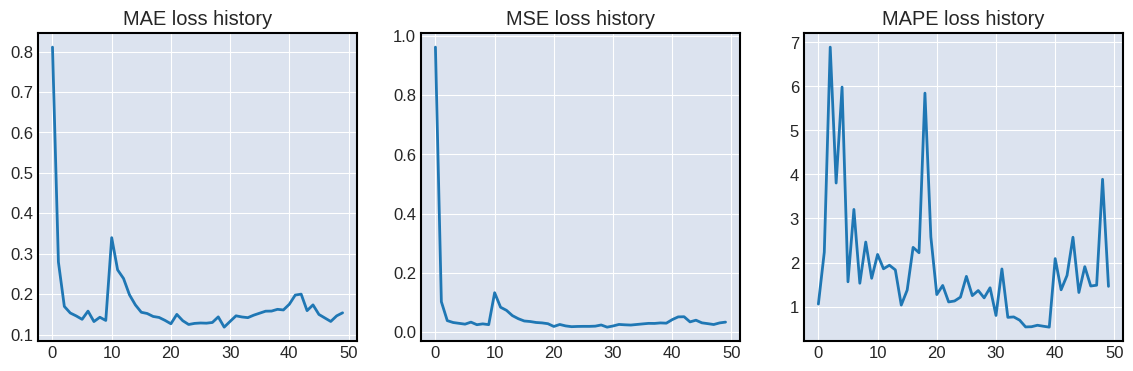

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

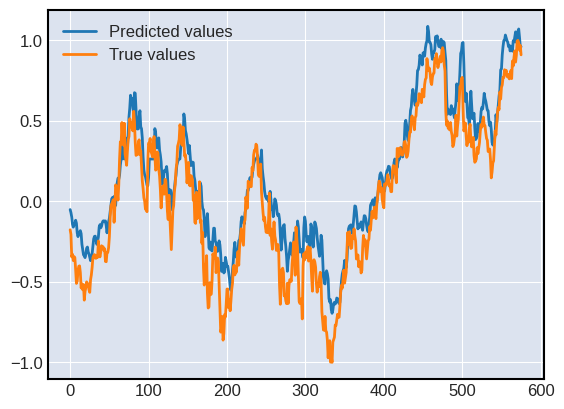

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model51(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 1
hidden_size = 10
output_size = 1

# Define the model, loss function, and optimizer
model52 = CNNModel(input_size, hidden_size, output_size).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model52.parameters(), lr=1e-3)
print(model52)

CNNModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=320, out_features=32, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model52.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model52(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model52.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model52(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0241, Test Loss: 0.1890, MAE: 0.3847, MSE: 0.1890, MAPE: 5.7634
Epoch [10/10] - Training Loss: 0.0125, Test Loss: 0.1492, MAE: 0.3390, MSE: 0.1492, MAPE: 3.5813
Epoch [5/10] - Training Loss: 0.0049, Test Loss: 0.3234, MAE: 0.4902, MSE: 0.3234, MAPE: 3.0117
Epoch [10/10] - Training Loss: 0.0036, Test Loss: 0.2099, MAE: 0.4002, MSE: 0.2099, MAPE: 33.1009
Epoch [5/10] - Training Loss: 0.0019, Test Loss: 0.1026, MAE: 0.3140, MSE: 0.1026, MAPE: 2.4857
Epoch [10/10] - Training Loss: 0.0018, Test Loss: 0.0720, MAE: 0.2613, MSE: 0.0720, MAPE: 1.1308
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0145, MAE: 0.0981, MSE: 0.0145, MAPE: 0.4267
Epoch [10/10] - Training Loss: 0.0006, Test Loss: 0.0123, MAE: 0.0869, MSE: 0.0123, MAPE: 0.4217
Epoch [5/10] - Training Loss: 0.0004, Test Loss: 0.0291, MAE: 0.1452, MSE: 0.0291, MAPE: 1.0707
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0257, MAE: 0.1338, MSE: 0.0257, MAPE: 1.0887


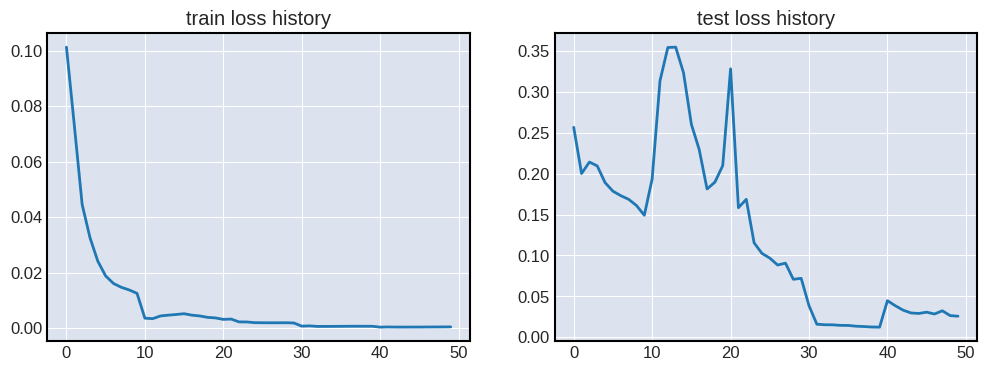

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

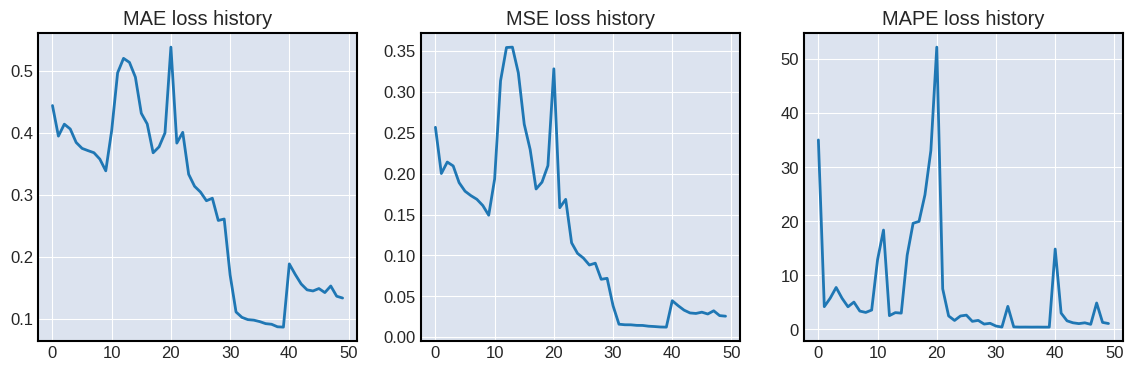

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

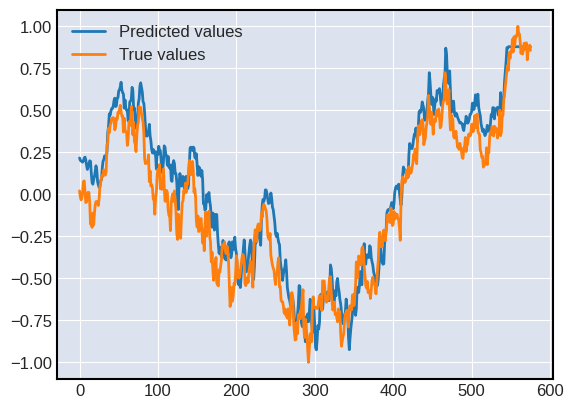

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model52(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 1
hidden_size = 10
output_size = 1

# Define the model, loss function, and optimizer
model53 = CNNModel(input_size, hidden_size, output_size).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model53.parameters(), lr=1e-3)
print(model53)

CNNModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=320, out_features=32, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model53.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model53(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model53.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model53(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0088, Test Loss: 0.0469, MAE: 0.1791, MSE: 0.0469, MAPE: 1.1601
Epoch [10/10] - Training Loss: 0.0077, Test Loss: 0.0434, MAE: 0.1697, MSE: 0.0434, MAPE: 0.9037
Epoch [5/10] - Training Loss: 0.0025, Test Loss: 0.0496, MAE: 0.1859, MSE: 0.0496, MAPE: 0.7113
Epoch [10/10] - Training Loss: 0.0020, Test Loss: 0.0482, MAE: 0.1822, MSE: 0.0482, MAPE: 0.5997
Epoch [5/10] - Training Loss: 0.0009, Test Loss: 0.0314, MAE: 0.1599, MSE: 0.0314, MAPE: 0.3508
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0356, MAE: 0.1718, MSE: 0.0356, MAPE: 0.3665
Epoch [5/10] - Training Loss: 0.0005, Test Loss: 0.0170, MAE: 0.1128, MSE: 0.0170, MAPE: 0.2077
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0144, MAE: 0.0933, MSE: 0.0144, MAPE: 0.1804
Epoch [5/10] - Training Loss: 0.0004, Test Loss: 0.0162, MAE: 0.1057, MSE: 0.0162, MAPE: 0.8713
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0203, MAE: 0.1202, MSE: 0.0203, MAPE: 3.0006


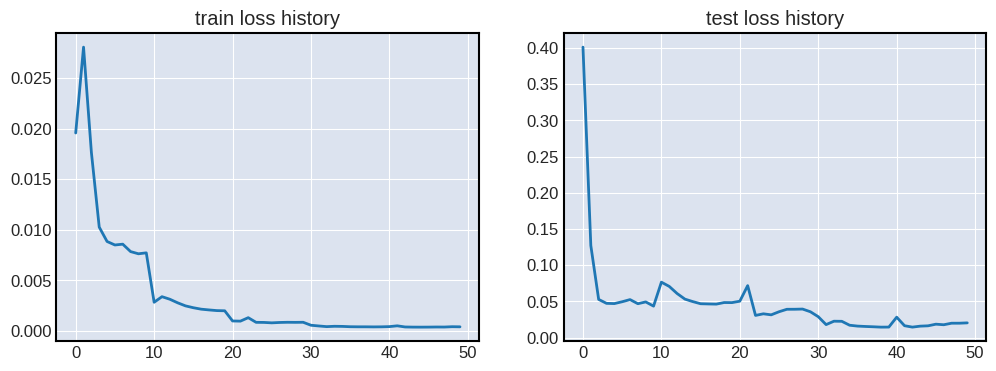

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

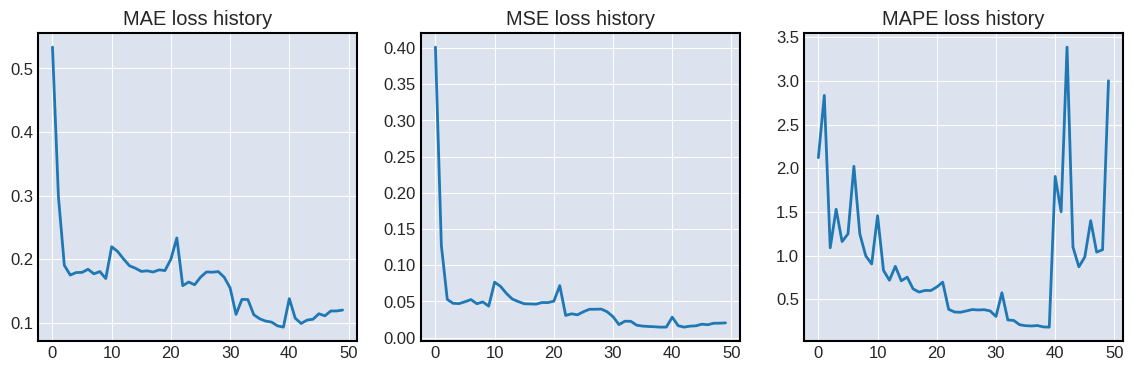

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

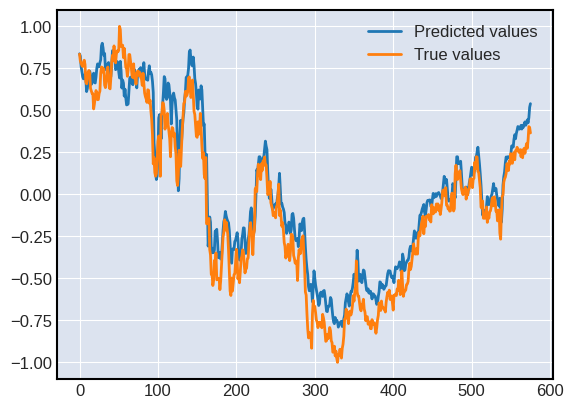

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model53(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 1
hidden_size = 10
output_size = 1

# Define the model, loss function, and optimizer
model54 = CNNModel(input_size, hidden_size, output_size).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model54.parameters(), lr=1e-3)
print(model54)

CNNModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=320, out_features=32, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model54.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model54(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model54.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model54(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.3713, MAE: 0.4301, MSE: 0.3713, MAPE: 0.9578
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.3713, MAE: 0.4301, MSE: 0.3713, MAPE: 0.9578
Epoch [5/10] - Training Loss: 0.0029, Test Loss: 0.1189, MAE: 0.2902, MSE: 0.1189, MAPE: 12.9884
Epoch [10/10] - Training Loss: 0.0018, Test Loss: 0.0978, MAE: 0.2772, MSE: 0.0978, MAPE: 1.0217
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0387, MAE: 0.1787, MSE: 0.0387, MAPE: 1.1800
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0352, MAE: 0.1674, MSE: 0.0352, MAPE: 0.9432
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0436, MAE: 0.1947, MSE: 0.0436, MAPE: 1.7468
Epoch [10/10] - Training Loss: 0.0006, Test Loss: 0.0211, MAE: 0.1198, MSE: 0.0211, MAPE: 0.4956
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0322, MAE: 0.1670, MSE: 0.0322, MAPE: 1.7031
Epoch [10/10] - Training Loss: 0.0005, Test Loss: 0.0324, MAE: 0.1686, MSE: 0.0324, MAPE: 6.9240


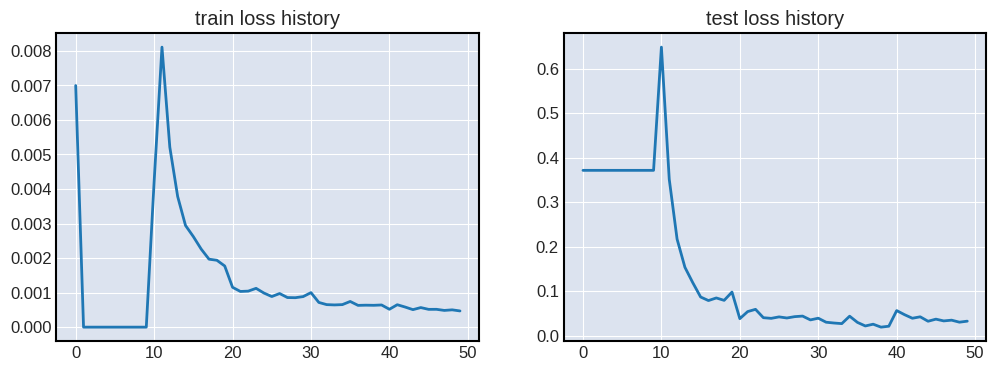

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

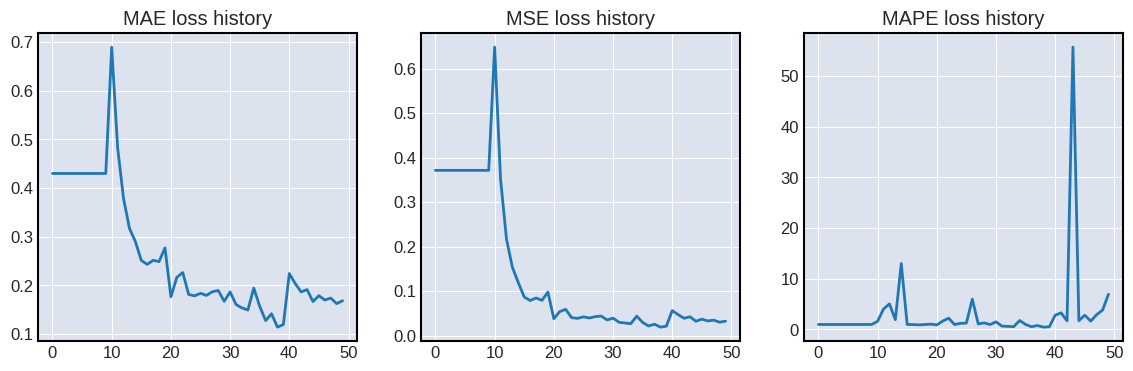

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

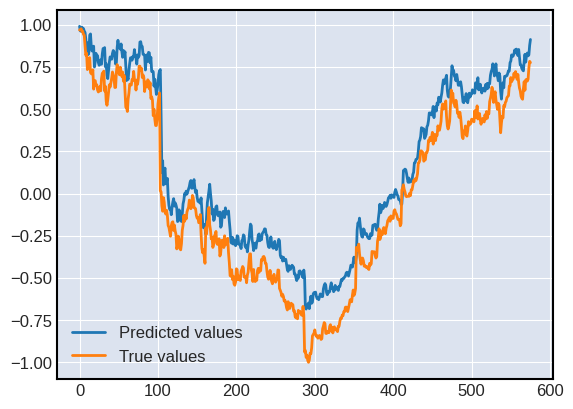

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model54(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 1
hidden_size = 10
output_size = 1

# Define the model, loss function, and optimizer
model55 = CNNModel(input_size, hidden_size, output_size).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model55.parameters(), lr=1e-3)
print(model55)

CNNModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=320, out_features=32, bias=True)
  (relu2): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model55.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model55(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j].unsqueeze(0))

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model55.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model55(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j].unsqueeze(0))
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].unsqueeze(0).cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0124, Test Loss: 0.0814, MAE: 0.2143, MSE: 0.0814, MAPE: 1.7478
Epoch [10/10] - Training Loss: 0.0099, Test Loss: 0.0633, MAE: 0.1862, MSE: 0.0633, MAPE: 1.4111
Epoch [5/10] - Training Loss: 0.0017, Test Loss: 0.0799, MAE: 0.2481, MSE: 0.0799, MAPE: 1.0822
Epoch [10/10] - Training Loss: 0.0020, Test Loss: 0.0729, MAE: 0.2427, MSE: 0.0729, MAPE: 0.7559
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0460, MAE: 0.1959, MSE: 0.0460, MAPE: 0.6659
Epoch [10/10] - Training Loss: 0.0011, Test Loss: 0.0433, MAE: 0.1851, MSE: 0.0433, MAPE: 0.5897
Epoch [5/10] - Training Loss: 0.0007, Test Loss: 0.0332, MAE: 0.1701, MSE: 0.0332, MAPE: 0.5609
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0232, MAE: 0.1436, MSE: 0.0232, MAPE: 1.8209
Epoch [5/10] - Training Loss: 0.0004, Test Loss: 0.0268, MAE: 0.1374, MSE: 0.0268, MAPE: 0.9717
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0250, MAE: 0.1317, MSE: 0.0250, MAPE: 0.8693


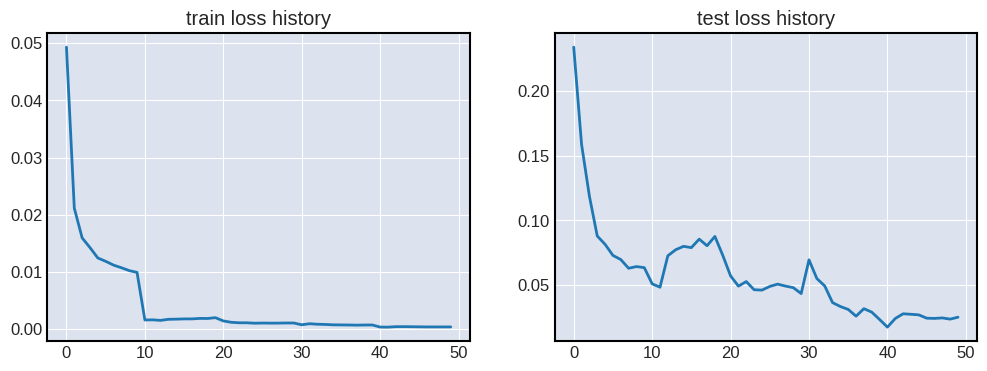

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

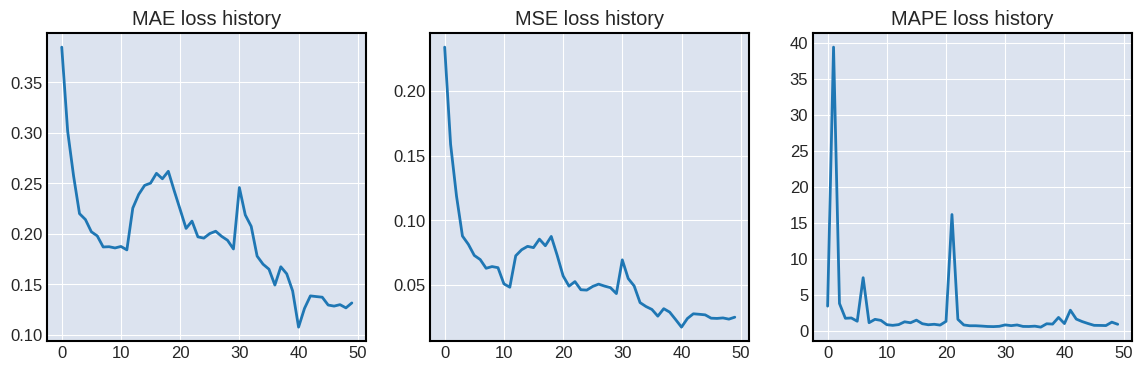

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

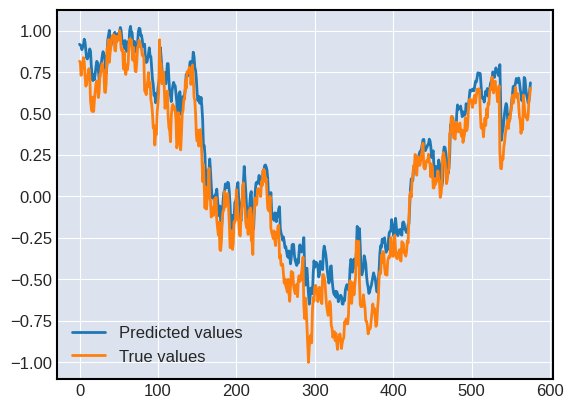

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model55(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **CNN-LSTM**

In [ ]:
class CNNLSTMModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of MLPModel units
      # num_layers : number of MLPModel layers
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(CNNLSTMModel, self).__init__() #initializes the parent class nn.Module
        self.cnv = nn.Conv1d(input_size, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.lstm = nn.LSTM(64, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        x = self.cnv(x)
        x = self.relu(x)
        x = self.pool(x)
        features, length = x.size()
        x = self.flatten(x)
        x = x.reshape(length, features)
        lstm_out, _ = self.lstm(x)
        aggregated = torch.mean(lstm_out, dim=0)
        output = self.linear(aggregated)
        return output

### **AAPL**

In [ ]:
input_size = 1
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model51 = CNNLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model51.parameters(), lr=1e-3)
print(model51)

CNNLSTMModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm): LSTM(64, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 0
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model51.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model51(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j])

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model51.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model51(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j])
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0065, Test Loss: 0.0554, MAE: 0.2019, MSE: 0.0554, MAPE: 2.3779
Epoch [10/10] - Training Loss: 0.0054, Test Loss: 0.0375, MAE: 0.1580, MSE: 0.0375, MAPE: 19.0000
Epoch [5/10] - Training Loss: 0.0044, Test Loss: 0.0587, MAE: 0.2047, MSE: 0.0587, MAPE: 1.7643
Epoch [10/10] - Training Loss: 0.0034, Test Loss: 0.0385, MAE: 0.1635, MSE: 0.0385, MAPE: 1.7599
Epoch [5/10] - Training Loss: 0.0025, Test Loss: 0.0308, MAE: 0.1563, MSE: 0.0308, MAPE: 1.3937
Epoch [10/10] - Training Loss: 0.0021, Test Loss: 0.0250, MAE: 0.1402, MSE: 0.0250, MAPE: 1.4295
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0492, MAE: 0.1918, MSE: 0.0492, MAPE: 2.6218
Epoch [10/10] - Training Loss: 0.0012, Test Loss: 0.0437, MAE: 0.1765, MSE: 0.0437, MAPE: 2.1383
Epoch [5/10] - Training Loss: 0.0012, Test Loss: 0.0359, MAE: 0.1577, MSE: 0.0359, MAPE: 1.1119
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0308, MAE: 0.1461, MSE: 0.0308, MAPE: 2.4949


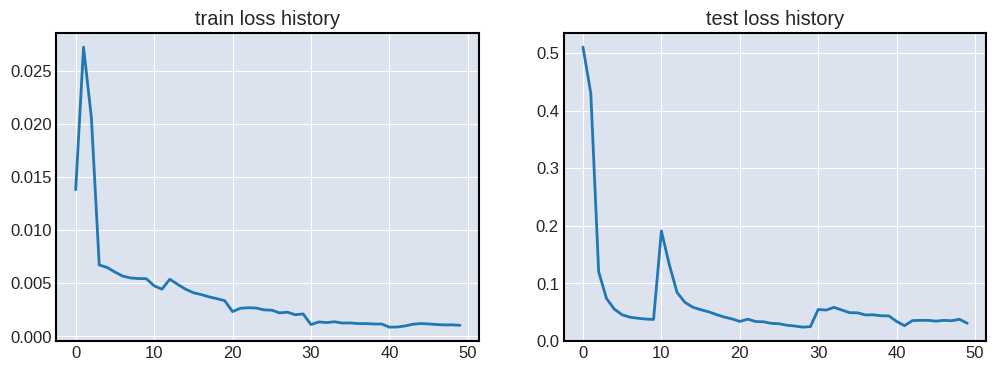

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

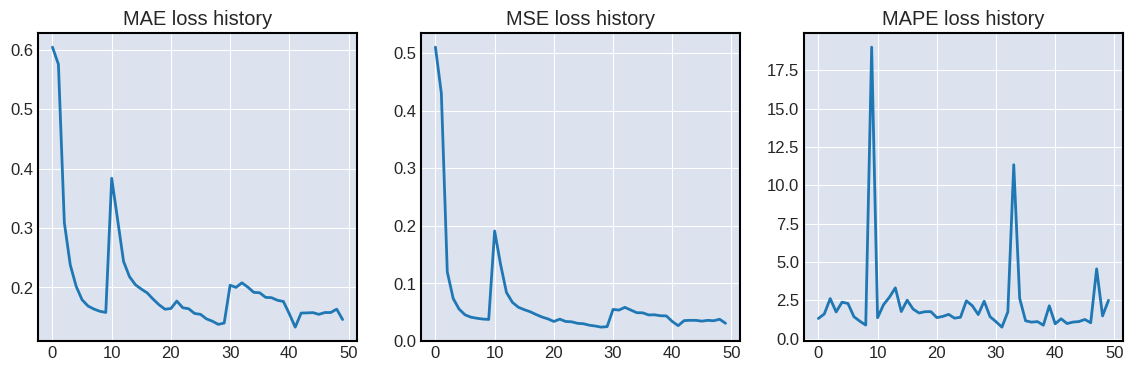

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

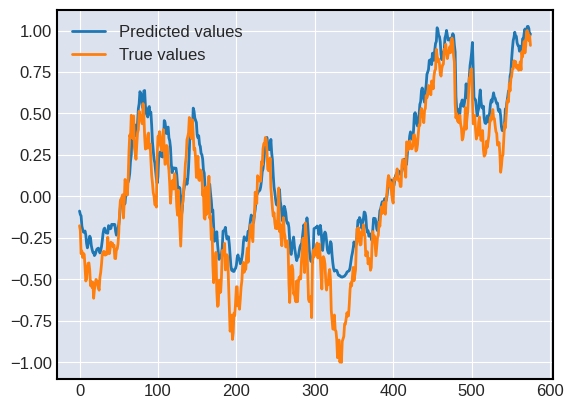

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model51(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **MSFT**

In [ ]:
input_size = 1
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model52 = CNNLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model52.parameters(), lr=1e-3)
print(model52)

CNNLSTMModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm): LSTM(64, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 1
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model52.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model52(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j])

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model52.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model52(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j])
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0182, Test Loss: 0.0806, MAE: 0.2525, MSE: 0.0806, MAPE: 2.5565
Epoch [10/10] - Training Loss: 0.0110, Test Loss: 0.0432, MAE: 0.1826, MSE: 0.0432, MAPE: 1.0593
Epoch [5/10] - Training Loss: 0.0032, Test Loss: 0.0654, MAE: 0.2251, MSE: 0.0654, MAPE: 1.7901
Epoch [10/10] - Training Loss: 0.0028, Test Loss: 0.0425, MAE: 0.1754, MSE: 0.0425, MAPE: 1.3401
Epoch [5/10] - Training Loss: 0.0015, Test Loss: 0.0590, MAE: 0.2208, MSE: 0.0590, MAPE: 0.7161
Epoch [10/10] - Training Loss: 0.0014, Test Loss: 0.0447, MAE: 0.1934, MSE: 0.0447, MAPE: 0.7229
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0259, MAE: 0.1383, MSE: 0.0259, MAPE: 1.1241
Epoch [10/10] - Training Loss: 0.0005, Test Loss: 0.0184, MAE: 0.1201, MSE: 0.0184, MAPE: 1.4104
Epoch [5/10] - Training Loss: 0.0003, Test Loss: 0.0229, MAE: 0.1303, MSE: 0.0229, MAPE: 1.1856
Epoch [10/10] - Training Loss: 0.0004, Test Loss: 0.0216, MAE: 0.1261, MSE: 0.0216, MAPE: 1.2282


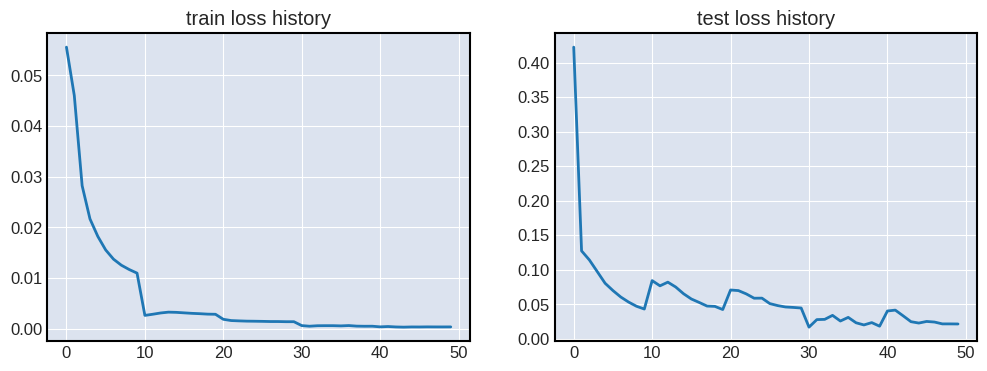

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

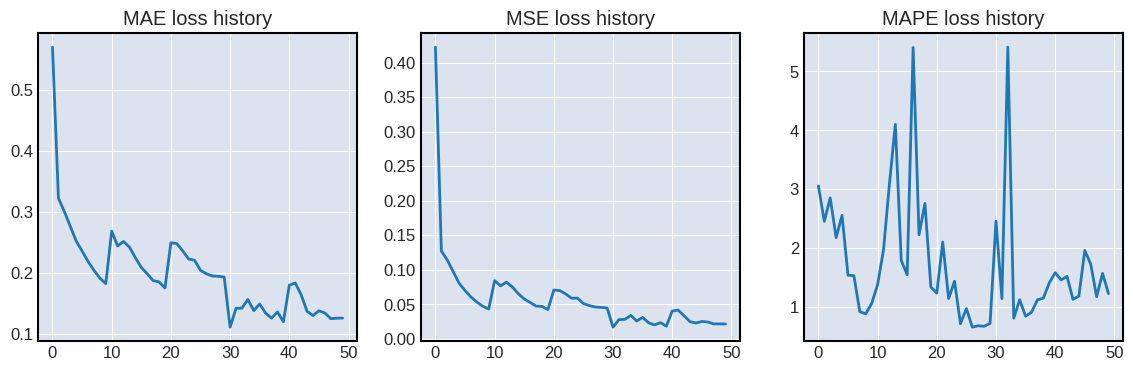

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

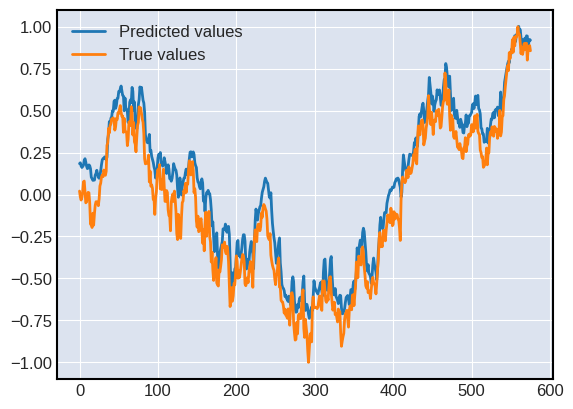

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model52(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **AMZN**

In [ ]:
input_size = 1
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model53 = CNNLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model53.parameters(), lr=1e-3)
print(model53)

CNNLSTMModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm): LSTM(64, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 2
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model53.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model53(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j])

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model53.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model53(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j])
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0181, Test Loss: 0.0910, MAE: 0.2480, MSE: 0.0910, MAPE: 2.2583
Epoch [10/10] - Training Loss: 0.0125, Test Loss: 0.0550, MAE: 0.1916, MSE: 0.0550, MAPE: 3.3405
Epoch [5/10] - Training Loss: 0.0048, Test Loss: 0.0890, MAE: 0.2494, MSE: 0.0890, MAPE: 1.6097
Epoch [10/10] - Training Loss: 0.0040, Test Loss: 0.0577, MAE: 0.2007, MSE: 0.0577, MAPE: 1.6826
Epoch [5/10] - Training Loss: 0.0017, Test Loss: 0.0444, MAE: 0.1833, MSE: 0.0444, MAPE: 0.5224
Epoch [10/10] - Training Loss: 0.0014, Test Loss: 0.0333, MAE: 0.1607, MSE: 0.0333, MAPE: 0.4018
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0412, MAE: 0.1853, MSE: 0.0412, MAPE: 0.4620
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0346, MAE: 0.1619, MSE: 0.0346, MAPE: 0.3549
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0249, MAE: 0.1331, MSE: 0.0249, MAPE: 15.0158
Epoch [10/10] - Training Loss: 0.0007, Test Loss: 0.0171, MAE: 0.1067, MSE: 0.0171, MAPE: 1.3635


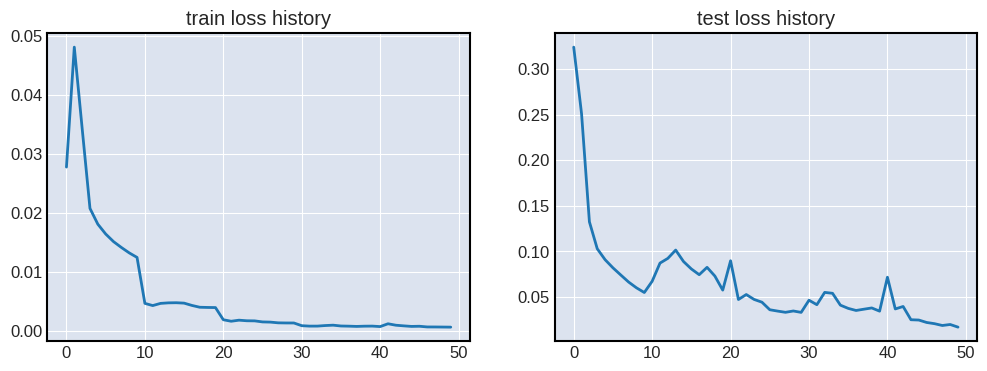

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

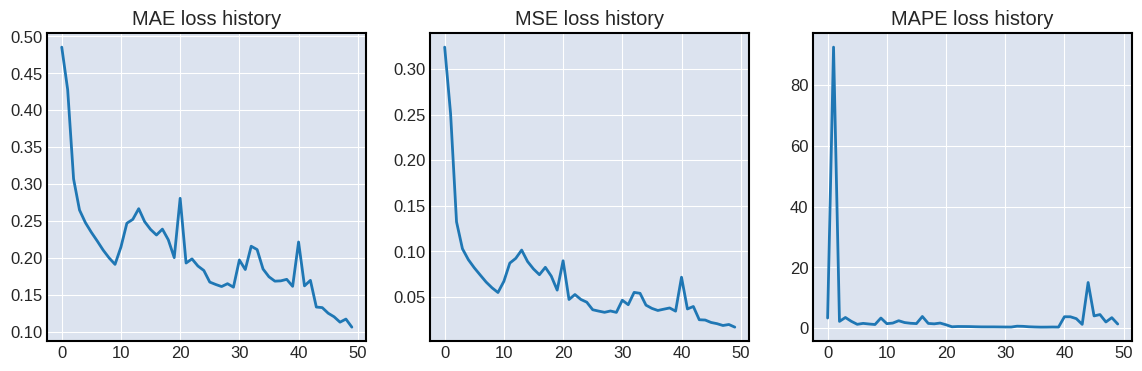

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

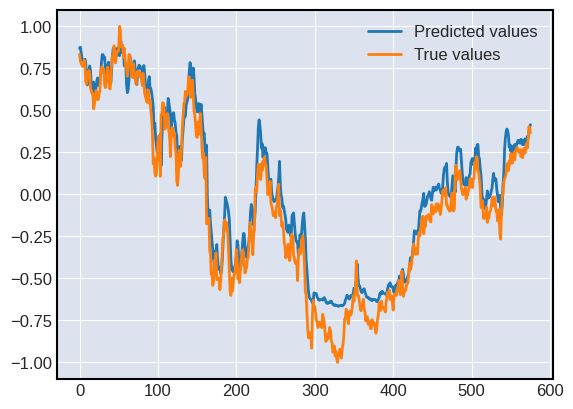

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model53(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **META**

In [ ]:
input_size = 1
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model54 = CNNLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model54.parameters(), lr=1e-3)
print(model54)

CNNLSTMModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm): LSTM(64, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 3
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model54.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model54(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j])

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model54.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model54(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j])
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0000, Test Loss: 0.7620, MAE: 0.6204, MSE: 0.7620, MAPE: 0.7599
Epoch [10/10] - Training Loss: 0.0000, Test Loss: 0.7620, MAE: 0.6204, MSE: 0.7620, MAPE: 0.7599
Epoch [5/10] - Training Loss: 0.0046, Test Loss: 0.2967, MAE: 0.4624, MSE: 0.2967, MAPE: 53.1373
Epoch [10/10] - Training Loss: 0.0027, Test Loss: 0.1277, MAE: 0.3154, MSE: 0.1277, MAPE: 1.5597
Epoch [5/10] - Training Loss: 0.0013, Test Loss: 0.0235, MAE: 0.1319, MSE: 0.0235, MAPE: 0.9589
Epoch [10/10] - Training Loss: 0.0010, Test Loss: 0.0196, MAE: 0.1202, MSE: 0.0196, MAPE: 0.8874
Epoch [5/10] - Training Loss: 0.0008, Test Loss: 0.0163, MAE: 0.1074, MSE: 0.0163, MAPE: 0.4292
Epoch [10/10] - Training Loss: 0.0008, Test Loss: 0.0142, MAE: 0.1002, MSE: 0.0142, MAPE: 0.4261
Epoch [5/10] - Training Loss: 0.0006, Test Loss: 0.0263, MAE: 0.1495, MSE: 0.0263, MAPE: 4.0967
Epoch [10/10] - Training Loss: 0.0006, Test Loss: 0.0244, MAE: 0.1432, MSE: 0.0244, MAPE: 1.7466


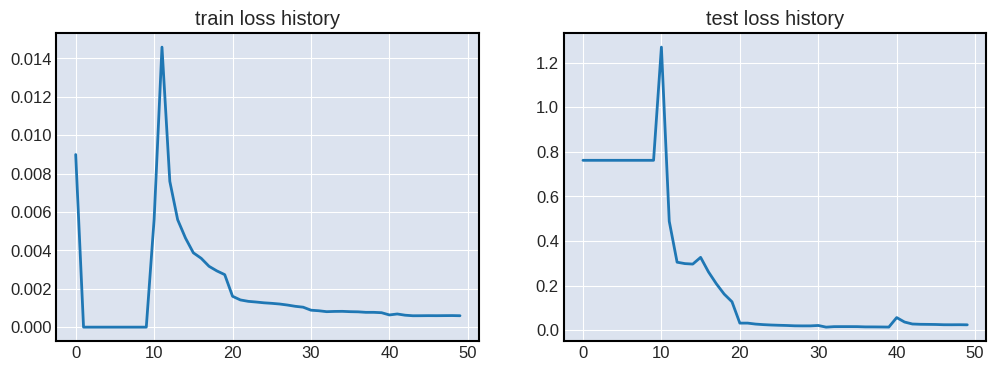

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

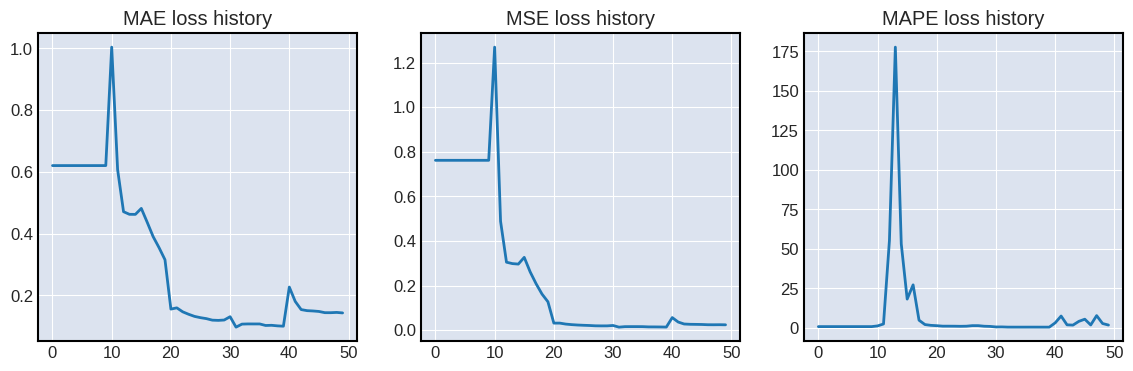

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

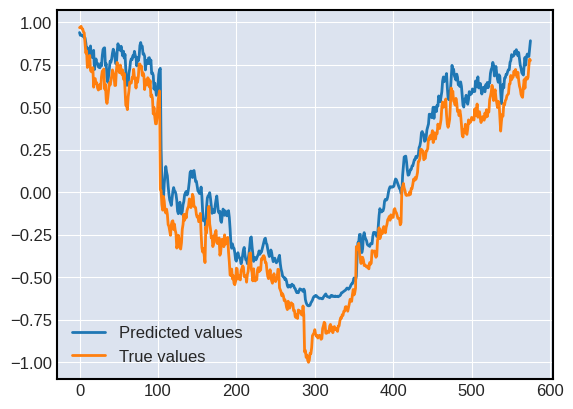

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model54(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

### **GOOGL**

In [ ]:
input_size = 1
num_layers = 1
hidden_size = 50
output_size = 1

# Define the model, loss function, and optimizer
model55 = CNNLSTMModel(input_size, hidden_size, output_size, num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model55.parameters(), lr=1e-3)
print(model55)

CNNLSTMModel(
  (cnv): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lstm): LSTM(64, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
num_epochs = 10
train_loss_hist = []
test_loss_hist = []
mae_hist = []
mse_hist = []
mape_hist = []



# Training loop
nds = 4
for i in range(0, 5):
# split: i
	# xTrain[nds][i] = torch.from_numpy(np.array(xTrain[nds][i])).type(torch.Tensor).to(device)
	# yTrain[nds][i] = torch.from_numpy(np.array(yTrain[nds][i])).type(torch.Tensor).to(device)
	# xVal[nds][i] = torch.from_numpy(np.array(xVal[nds][i])).type(torch.Tensor).to(device)
	# yVal[nds][i] = torch.from_numpy(np.array(yVal[nds][i])).type(torch.Tensor).to(device)

	for epoch in range(num_epochs):
		total_loss = 0.0

		# Training
		model55.train()
		for j in range(0, len(xTrain[nds][i])):

			predictions = model55(xTrain[nds][i][j].unsqueeze(0))
			loss = loss_fn(predictions, yTrain[nds][i][j])

			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		# Calculate average training loss and accuracy
		average_loss = total_loss / len(xTrain[nds][i])
		train_loss_hist.append(average_loss)

		# Validation on test data
		model55.eval()
		with torch.no_grad():
			total_test_loss = 0.0
			total_mae = 0.0
			total_mse = 0.0
			total_mape = 0.0
			for j in range(0, len(xVal[nds][i])):
				predictions_test = model55(xVal[nds][i][j].unsqueeze(0))
				test_loss = loss_fn(predictions_test, yVal[nds][i][j])
				mae = mean_absolute_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mse = mean_squared_error(predictions_test.cpu(), yVal[nds][i][j].cpu())
				mape = mean_absolute_percentage_error(predictions_test.cpu(), yVal[nds][i][j].cpu())

				total_test_loss += test_loss.item()
				total_mae += mae.item()
				total_mse += mse.item()
				total_mape += mape.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(xVal[nds][i])
		average_mae = total_mae / len(xVal[nds][i])
		average_mse = total_mse / len(xVal[nds][i])
		average_mape = total_mape / len(xVal[nds][i])

		test_loss_hist.append(average_test_loss)
		mae_hist.append(average_mae)
		mse_hist.append(average_mse)
		mape_hist.append(average_mape)

		if ((epoch+1)%5==0):
			print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}, MAE: {average_mae:.4f}, MSE: {average_mse:.4f}, MAPE: {average_mape:.4f}')


Epoch [5/10] - Training Loss: 0.0206, Test Loss: 0.0901, MAE: 0.2107, MSE: 0.0901, MAPE: 7.1065
Epoch [10/10] - Training Loss: 0.0133, Test Loss: 0.0582, MAE: 0.1781, MSE: 0.0582, MAPE: 2.3821
Epoch [5/10] - Training Loss: 0.0026, Test Loss: 0.0652, MAE: 0.2221, MSE: 0.0652, MAPE: 0.7513
Epoch [10/10] - Training Loss: 0.0028, Test Loss: 0.0460, MAE: 0.1886, MSE: 0.0460, MAPE: 1.1966
Epoch [5/10] - Training Loss: 0.0014, Test Loss: 0.0327, MAE: 0.1614, MSE: 0.0327, MAPE: 0.8823
Epoch [10/10] - Training Loss: 0.0013, Test Loss: 0.0279, MAE: 0.1473, MSE: 0.0279, MAPE: 0.6929
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0470, MAE: 0.2003, MSE: 0.0470, MAPE: 1.6209
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0401, MAE: 0.1844, MSE: 0.0401, MAPE: 0.9212
Epoch [5/10] - Training Loss: 0.0010, Test Loss: 0.0416, MAE: 0.1732, MSE: 0.0416, MAPE: 1.9344
Epoch [10/10] - Training Loss: 0.0009, Test Loss: 0.0366, MAE: 0.1584, MSE: 0.0366, MAPE: 1.8120


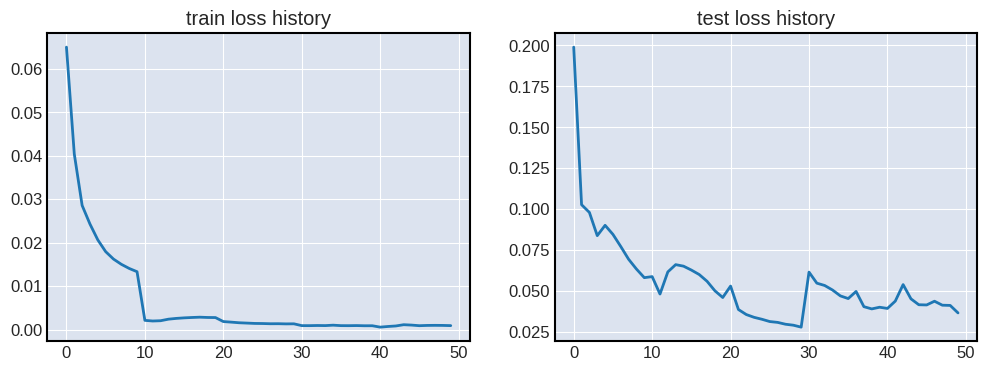

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_hist)
plt.title("train loss history")
plt.subplot(1, 2, 2)
plt.plot(test_loss_hist)
plt.title("test loss history")
plt.show()

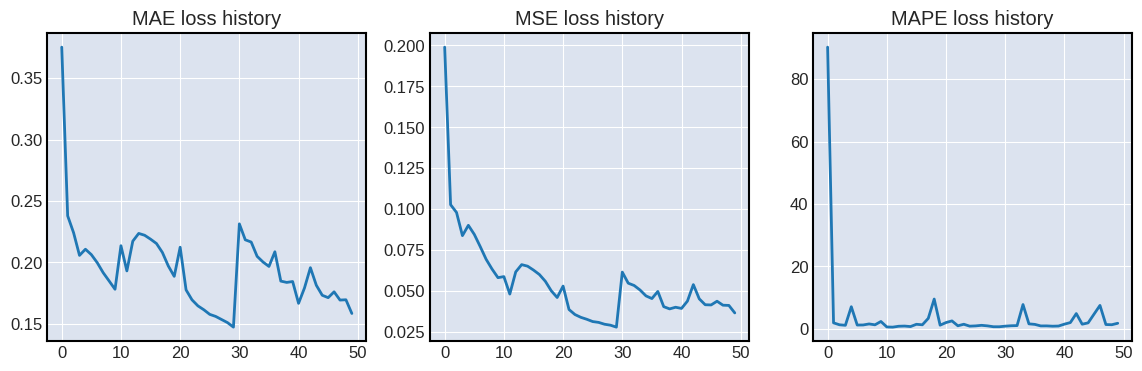

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(mae_hist)
plt.title("MAE loss history")
plt.subplot(1, 3, 2)
plt.plot(mse_hist)
plt.title("MSE loss history")
plt.subplot(1, 3, 3)
plt.plot(mape_hist)
plt.title("MAPE loss history")
plt.show()

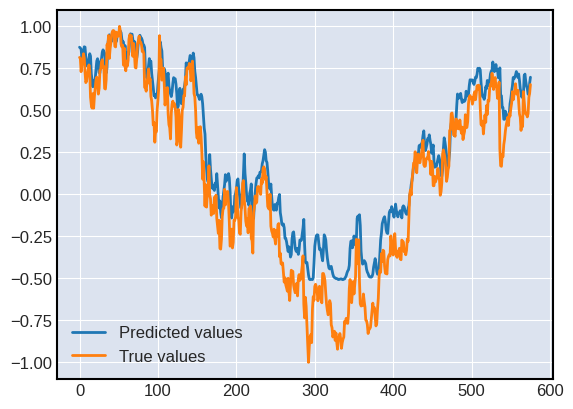

In [ ]:
with torch.no_grad():
  predictions_test = []
  for j in range(0, len(xVal[nds][4])):
    predictions_test.append(model55(xVal[nds][i][j].unsqueeze(0)).item())

plt.plot(predictions_test, label='Predicted values')
plt.plot(yVal[nds][4].cpu(), label='True values')
plt.legend()
plt.show()

# **1-6)**

# **Naive Forcast: Lag adding**

## **AAPL**

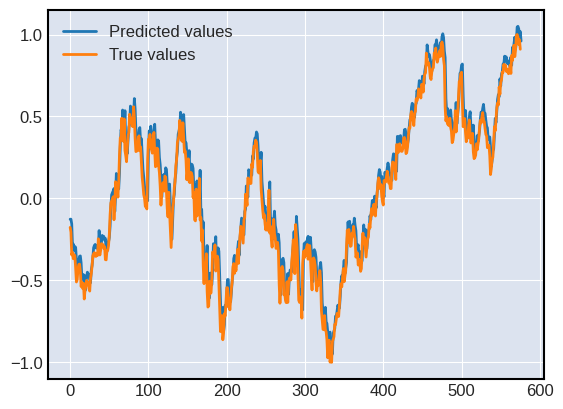

(0.050000012, 0.0025000009, 0.45200825)

In [ ]:
nds = 0
naive_ds_ = np.concatenate((np.reshape(yVal[nds][4][0].cpu(), (-1,1)), yVal[nds][4].cpu()), axis=0)
prev_ds_ = yVal[nds][4].cpu()
naive_ds_ = naive_ds_ + (-0.05 if random.random() < 0.5 else 0.05)

plt.plot(naive_ds_, label='Predicted values')
plt.plot(prev_ds_, label='True values')
plt.legend()
plt.show()
mae = mean_absolute_error(naive_ds_[1:], prev_ds_)
mse = mean_squared_error(naive_ds_[1:], prev_ds_)
mape = mean_absolute_percentage_error(naive_ds_[1:], prev_ds_)
mae, mse, mape

## **MSFT**

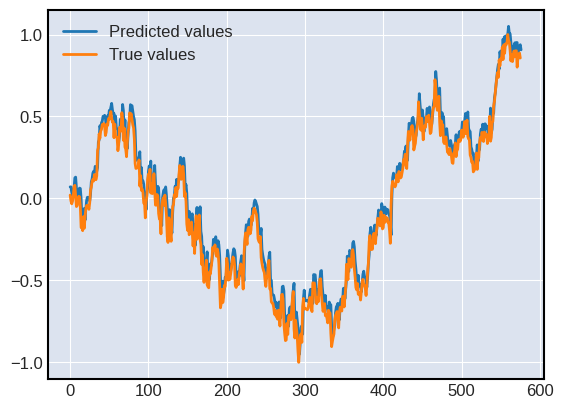

(0.05000001, 0.0025000004, 0.91789573)

In [ ]:
nds = 1
naive_ds_ = np.concatenate((np.reshape(yVal[nds][4][0].cpu(), (-1,1)), yVal[nds][4].cpu()), axis=0)
prev_ds_ = yVal[nds][4].cpu()
naive_ds_ = naive_ds_ + (-0.05 if random.random() < 0.5 else 0.05)

plt.plot(naive_ds_, label='Predicted values')
plt.plot(prev_ds_, label='True values')
plt.legend()
plt.show()
mae = mean_absolute_error(naive_ds_[1:], prev_ds_)
mse = mean_squared_error(naive_ds_[1:], prev_ds_)
mape = mean_absolute_percentage_error(naive_ds_[1:], prev_ds_)
mae, mse, mape

## **AMZN**

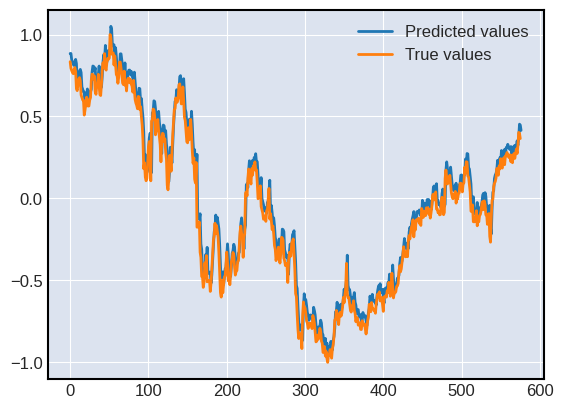

(0.05000001, 0.0025000004, 0.7585971)

In [ ]:
nds = 2
naive_ds_ = np.concatenate((np.reshape(yVal[nds][4][0].cpu(), (-1,1)), yVal[nds][4].cpu()), axis=0)
prev_ds_ = yVal[nds][4].cpu()
naive_ds_ = naive_ds_ + (-0.05 if random.random() < 0.5 else 0.05)

plt.plot(naive_ds_, label='Predicted values')
plt.plot(prev_ds_, label='True values')
plt.legend()
plt.show()
mae = mean_absolute_error(naive_ds_[1:], prev_ds_)
mse = mean_squared_error(naive_ds_[1:], prev_ds_)
mape = mean_absolute_percentage_error(naive_ds_[1:], prev_ds_)
mae, mse, mape

## **META**

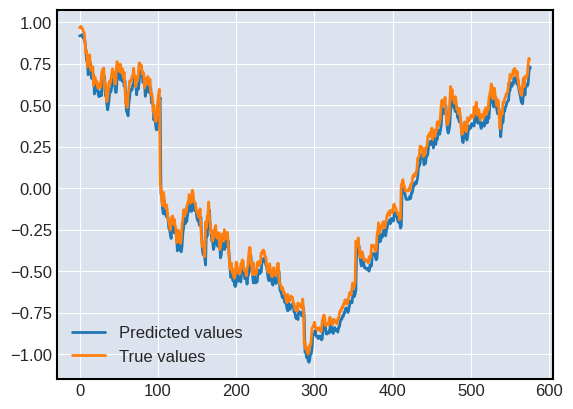

(0.050000012, 0.0025000009, 0.24949032)

In [ ]:
nds = 3
naive_ds_ = np.concatenate((np.reshape(yVal[nds][4][0].cpu(), (-1,1)), yVal[nds][4].cpu()), axis=0)
prev_ds_ = yVal[nds][4].cpu()
naive_ds_ = naive_ds_ + (-0.05 if random.random() < 0.5 else 0.05)

plt.plot(naive_ds_, label='Predicted values')
plt.plot(prev_ds_, label='True values')
plt.legend()
plt.show()
mae = mean_absolute_error(naive_ds_[1:], prev_ds_)
mse = mean_squared_error(naive_ds_[1:], prev_ds_)
mape = mean_absolute_percentage_error(naive_ds_[1:], prev_ds_)
mae, mse, mape

## **GOOGL**

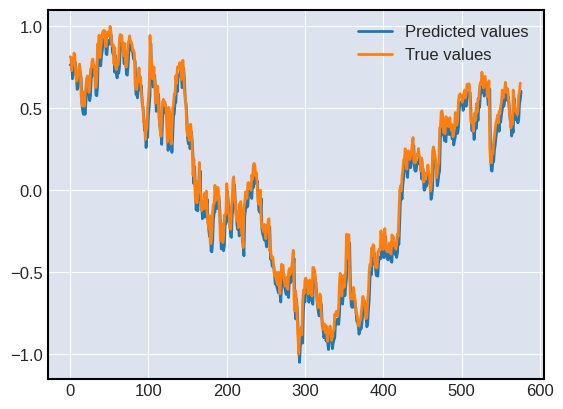

(0.050000012, 0.0025000006, 0.43830895)

In [ ]:
nds = 4
naive_ds_ = np.concatenate((np.reshape(yVal[nds][4][0].cpu(), (-1,1)), yVal[nds][4].cpu()), axis=0)
prev_ds_ = yVal[nds][4].cpu()
naive_ds_ = naive_ds_ + (-0.05 if random.random() < 0.5 else 0.05)

plt.plot(naive_ds_, label='Predicted values')
plt.plot(prev_ds_, label='True values')
plt.legend()
plt.show()
mae = mean_absolute_error(naive_ds_[1:], prev_ds_)
mse = mean_squared_error(naive_ds_[1:], prev_ds_)
mape = mean_absolute_percentage_error(naive_ds_[1:], prev_ds_)
mae, mse, mape